# Pre-Processing

In [2]:
# Init pack
#run the model without additional noise, plot the same intial conditions observe if the determinstic emulation matches the physical model
#emulator smooths out to a state in the same way as the physical model

import numpy as np
import numpy as np
from scipy.integrate import solve_ivp
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import sys
import torch
import matplotlib.pyplot as plt
from scipy.stats import linregress
from tqdm import tqdm


psi = np.load(r'/home/fabio/work/HM_and_AI_models/VAE_Model/data/time_series_deterministic.npy')
print(psi.shape)

# psi = psi[:,1,:]
print(psi.shape)

# Normalization
mean_psi = np.mean(psi, axis=0, keepdims=True)
mean = np.mean(mean_psi, axis=0, keepdims=True)

std_psi = np.std(psi, axis=0, keepdims=True)
normalized_psi = (psi - mean_psi) / std_psi
print(mean_psi)
print(std_psi)


# Pre-processing
lead = 1

trainN = 300000
valN = 50000
index = 63


psi_train_input = torch.tensor(normalized_psi[0:trainN, :], dtype=torch.float32)
psi_train_label = torch.tensor(normalized_psi[lead: trainN + lead, :], dtype=torch.float32)

psi_val_input = torch.tensor(normalized_psi[trainN:trainN+valN], dtype=torch.float32)
psi_val_label = torch.tensor(normalized_psi[trainN+lead:trainN+valN+lead], dtype=torch.float32)

print(psi_train_input.shape)
print(psi_train_label.shape)
print(psi_val_input.shape)
print(psi_val_label.shape)
plt.show()
# plt.plot(psi_val_input[0:50000,63]

(1000000, 75)
(1000000, 75)
[[ 5.47633454e+00  5.85292264e+00  5.59298497e+00  4.96925701e+00
   4.18959796e+00  3.39765643e+00  2.67585743e+00  2.05653990e+00
   1.55583105e+00  1.19849984e+00  9.88756116e-01  8.88185454e-01
   8.42262535e-01  8.08007354e-01  7.62137576e-01  6.97936426e-01
   6.19065465e-01  5.33371104e-01  4.48086879e-01  3.67630774e-01
   2.93696440e-01  2.26221254e-01  1.64318764e-01  1.06838231e-01
   5.25395690e-02  1.59326707e+00  2.79543874e+00  3.54657207e+00
   3.86956405e+00  3.82007303e+00  3.47409549e+00  2.93014015e+00
   2.29319540e+00  1.64247448e+00  1.04115559e+00  5.57901349e-01
   2.31983472e-01  5.50459508e-02 -9.71874540e-03 -5.34117572e-03
   3.11263303e-02  7.32526258e-02  1.06065536e-01  1.24109578e-01
   1.27794189e-01  1.19934251e-01  1.03660926e-01  8.16360950e-02
   5.59691606e-02  2.83245767e-02  4.69556452e+00  5.88168502e+00
   7.00109355e+00  8.03809163e+00  8.97886238e+00  9.82168129e+00
   1.05895574e+01  1.13290805e+01  1.20914097e+0

# Model Architecture

In [4]:
# Define the decoder (MLP)
class Decoder(nn.Module):
    def __init__(self, output_dim, condition_dim):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(condition_dim, 512)  
        self.fc2 = nn.Linear(512, 512)  
        self.fc3 = nn.Linear(512, 512) 
        self.fc4 = nn.Linear(512, 512)  
        self.fc5 = nn.Linear(512, 512)  
        self.fc6 = nn.Linear(512, 512)  
        self.fc_output = nn.Linear(512, output_dim)

    def forward(self, condition):
        condition = torch.relu(self.fc1(condition))  # Activation function for hidden layer
        condition = torch.relu(self.fc2(condition)) + condition
        condition = torch.relu(self.fc3(condition)) + condition
        condition = torch.relu(self.fc4(condition)) + condition
        condition = torch.relu(self.fc5(condition)) + condition
        condition = torch.relu(self.fc6(condition)) + condition
        output = self.fc_output(condition)
        return output

# Define the LatentDecoder class
class LatentDecoder(nn.Module):
    def __init__(self, output_dim, condition_dim):
        super(LatentDecoder, self).__init__()
        self.decoder = Decoder(output_dim, condition_dim)

    def decode(self, condition):
        return self.decoder(condition)

    def forward(self, condition):
        output = self.decode(condition)
        return output

output_dim = 75
condition_dim = 75
batch_size = 100
num_epochs = 1000

# Initialize Model and Set Folder Path

In [5]:
import datetime
import os

model = LatentDecoder(output_dim, condition_dim)
model = model.cuda()

optimizer = optim.Adam(model.parameters(), lr=0.000001)


timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S.%f")
folder = f"model_at_{timestamp}"
model_weights_path = f'{folder}/model_weights_pytorch.pth'
os.makedirs(folder)

# Training

Epoch 1, 
        Reconstrunction Loss: 0.0169137641787529

        Validation Reconstrunction Loss: 1.274949073791504


Mini Inference at Epoch 0:   0%|          | 0/99 [00:00<?, ?it/s]/tmp/ipykernel_1115/2264148706.py:91: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = model.decode(torch.tensor(initial_cond).float().cuda()).detach().cpu().numpy()
Mini Inference at Epoch 0: 100%|██████████| 99/99 [00:00<00:00, 1351.37it/s]


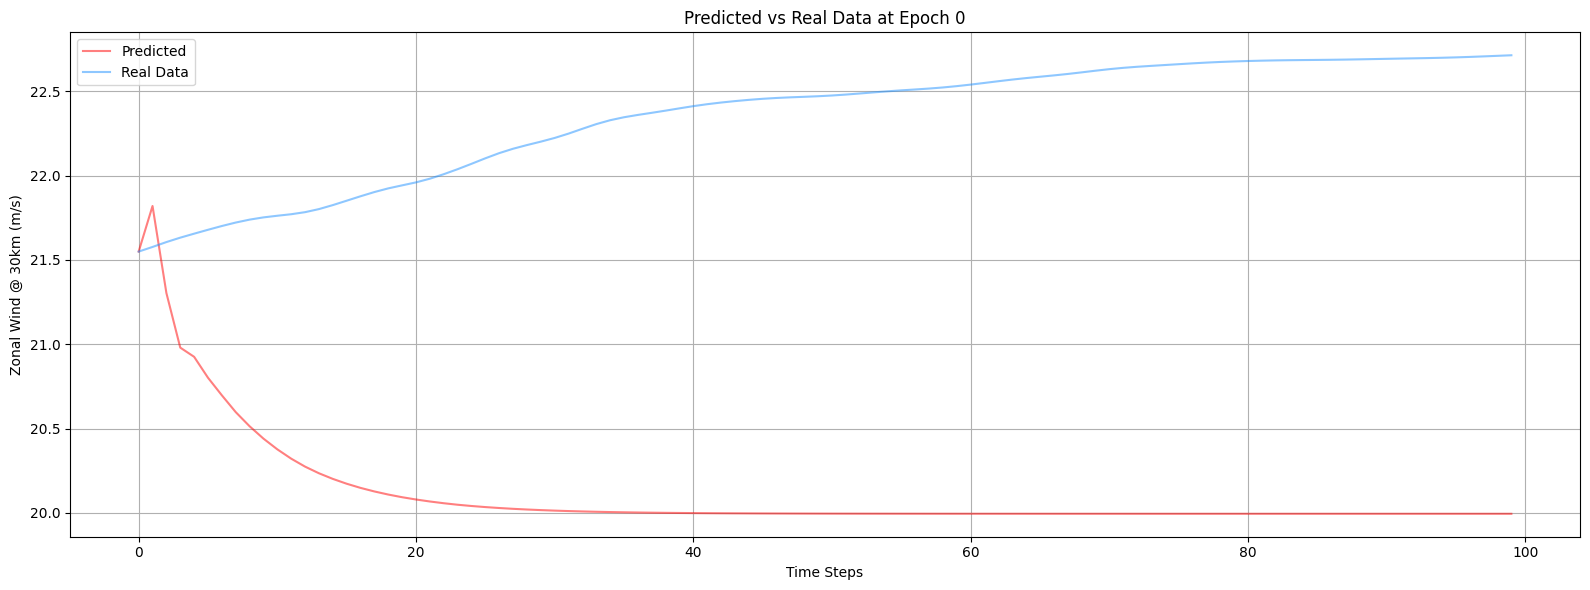

Epoch 2, 
        Reconstrunction Loss: 0.005983743350952864

        Validation Reconstrunction Loss: 1.059051752090454
Epoch 3, 
        Reconstrunction Loss: 0.0033634700812399387

        Validation Reconstrunction Loss: 0.8750933408737183


Mini Inference at Epoch 2: 100%|██████████| 99/99 [00:00<00:00, 1158.55it/s]


<Figure size 640x480 with 0 Axes>

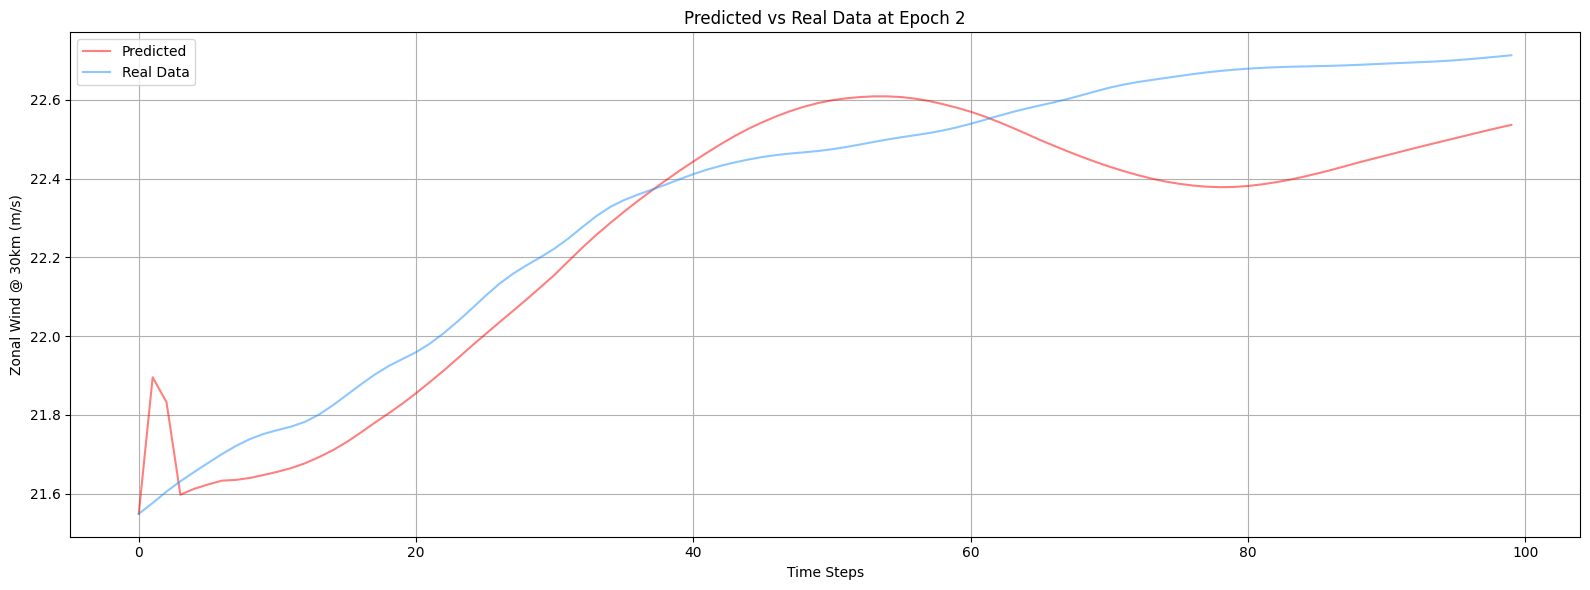

Epoch 4, 
        Reconstrunction Loss: 0.0025027436204254627

        Validation Reconstrunction Loss: 0.7260879278182983
Epoch 5, 
        Reconstrunction Loss: 0.0019850009121000767

        Validation Reconstrunction Loss: 0.6039044260978699


Mini Inference at Epoch 4: 100%|██████████| 99/99 [00:00<00:00, 1048.79it/s]


<Figure size 640x480 with 0 Axes>

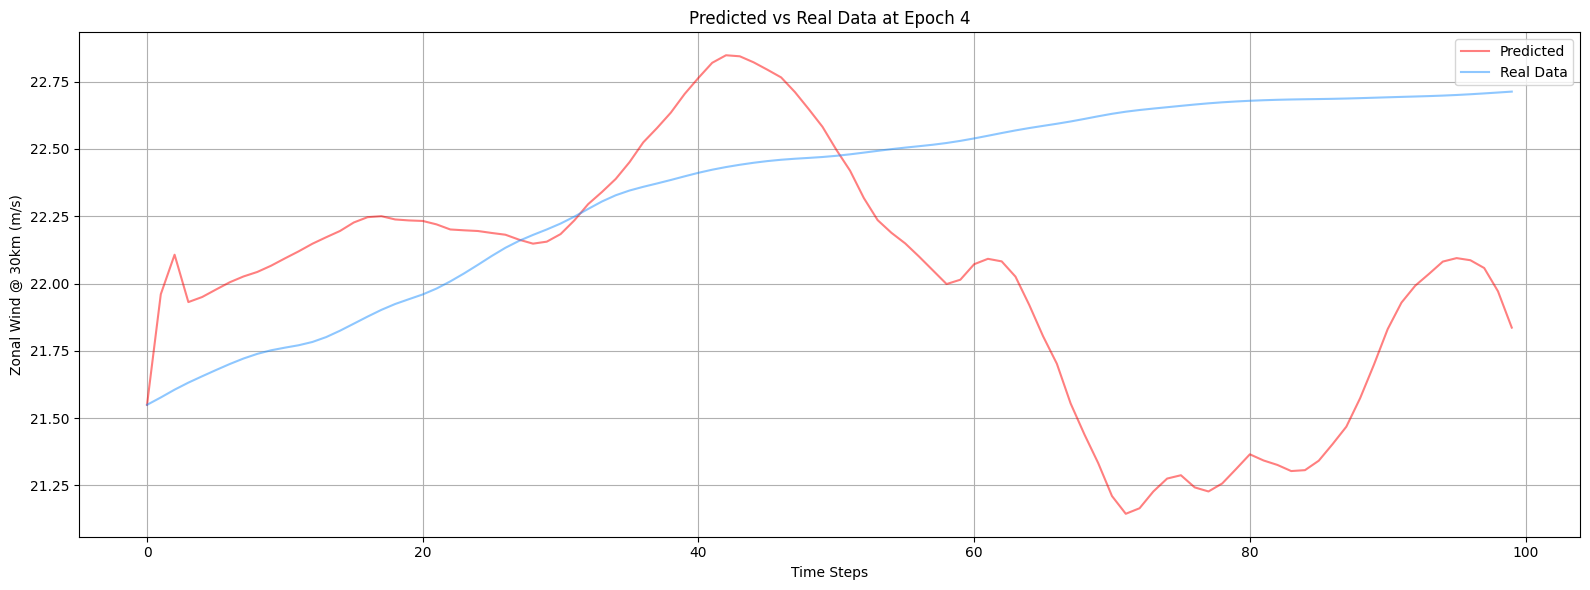

Epoch 6, 
        Reconstrunction Loss: 0.0016608365112915635

        Validation Reconstrunction Loss: 0.5034945607185364
Epoch 7, 
        Reconstrunction Loss: 0.0014637579442933202

        Validation Reconstrunction Loss: 0.42599204182624817


Mini Inference at Epoch 6: 100%|██████████| 99/99 [00:00<00:00, 1096.00it/s]


<Figure size 640x480 with 0 Axes>

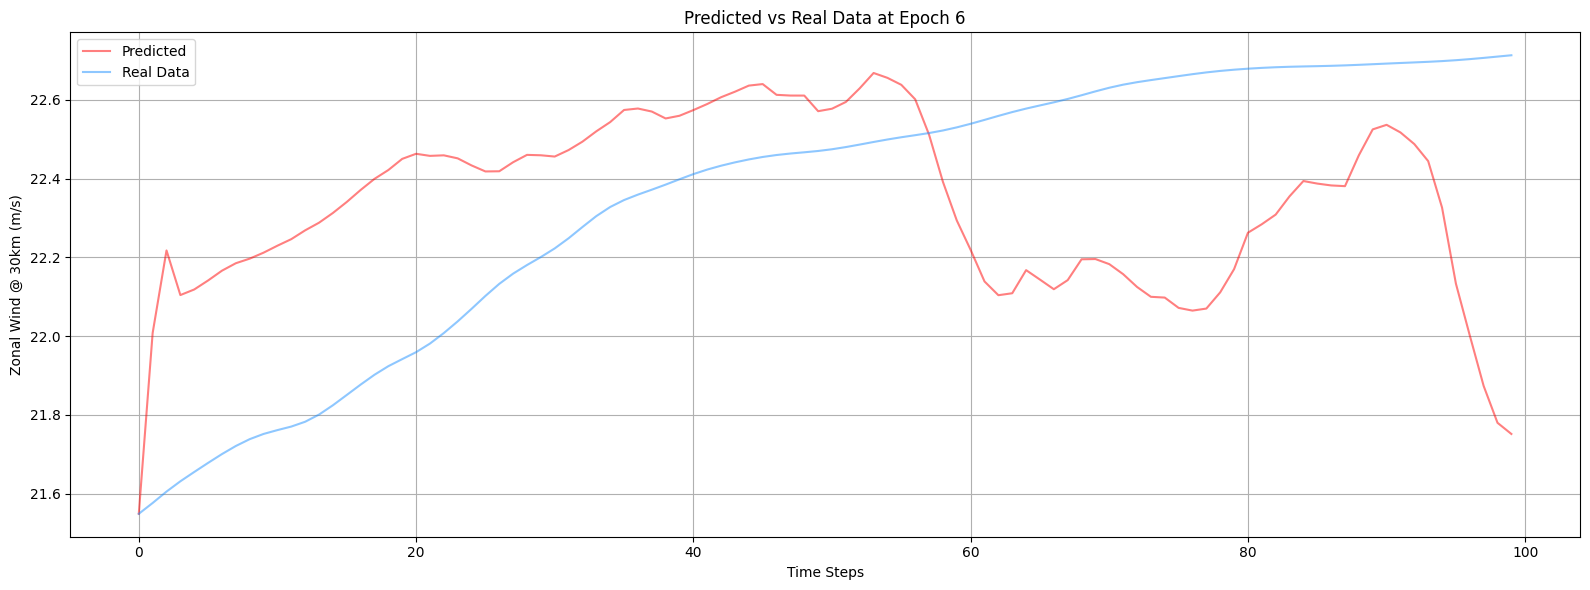

Epoch 8, 
        Reconstrunction Loss: 0.0013409326784312725

        Validation Reconstrunction Loss: 0.37091416120529175
Epoch 9, 
        Reconstrunction Loss: 0.00127068639267236

        Validation Reconstrunction Loss: 0.3355768918991089


Mini Inference at Epoch 8: 100%|██████████| 99/99 [00:00<00:00, 1418.30it/s]


<Figure size 640x480 with 0 Axes>

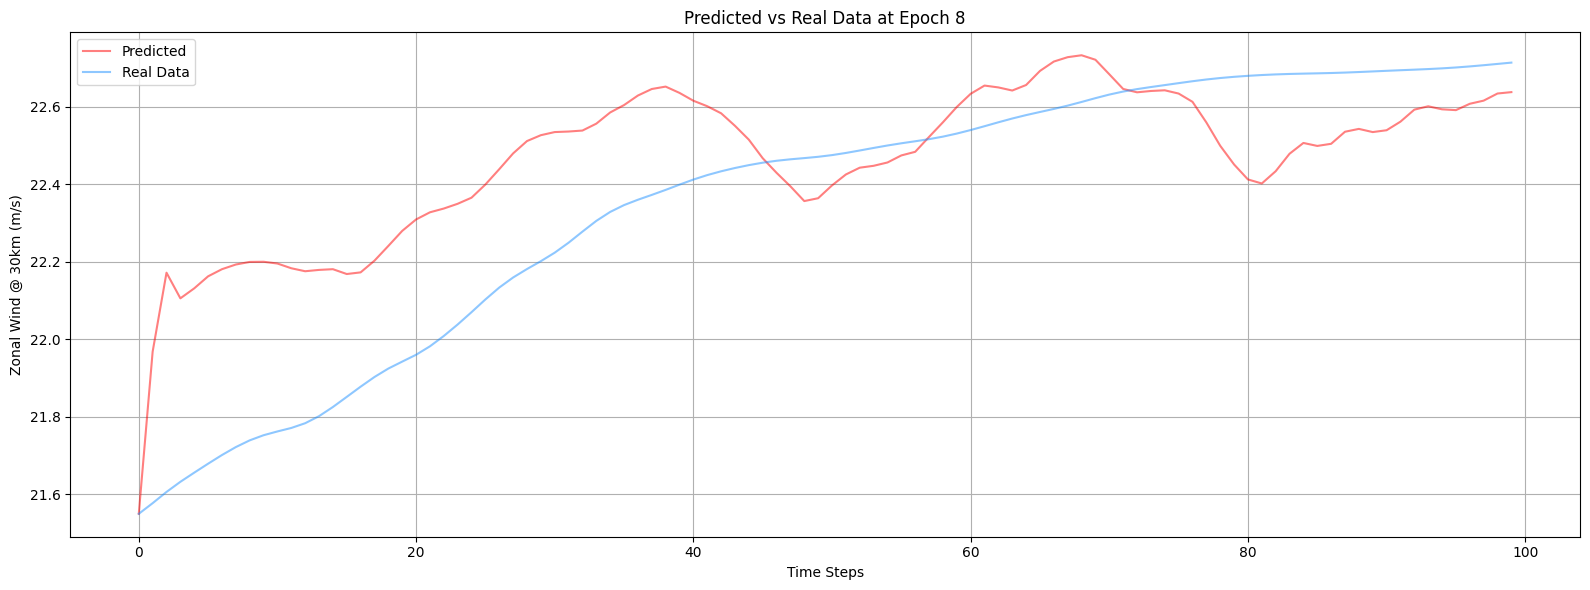

Epoch 10, 
        Reconstrunction Loss: 0.0012307710712775588

        Validation Reconstrunction Loss: 0.3124690055847168
Epoch 11, 
        Reconstrunction Loss: 0.0012046500341966748

        Validation Reconstrunction Loss: 0.2946934401988983


Mini Inference at Epoch 10: 100%|██████████| 99/99 [00:00<00:00, 1427.75it/s]


<Figure size 640x480 with 0 Axes>

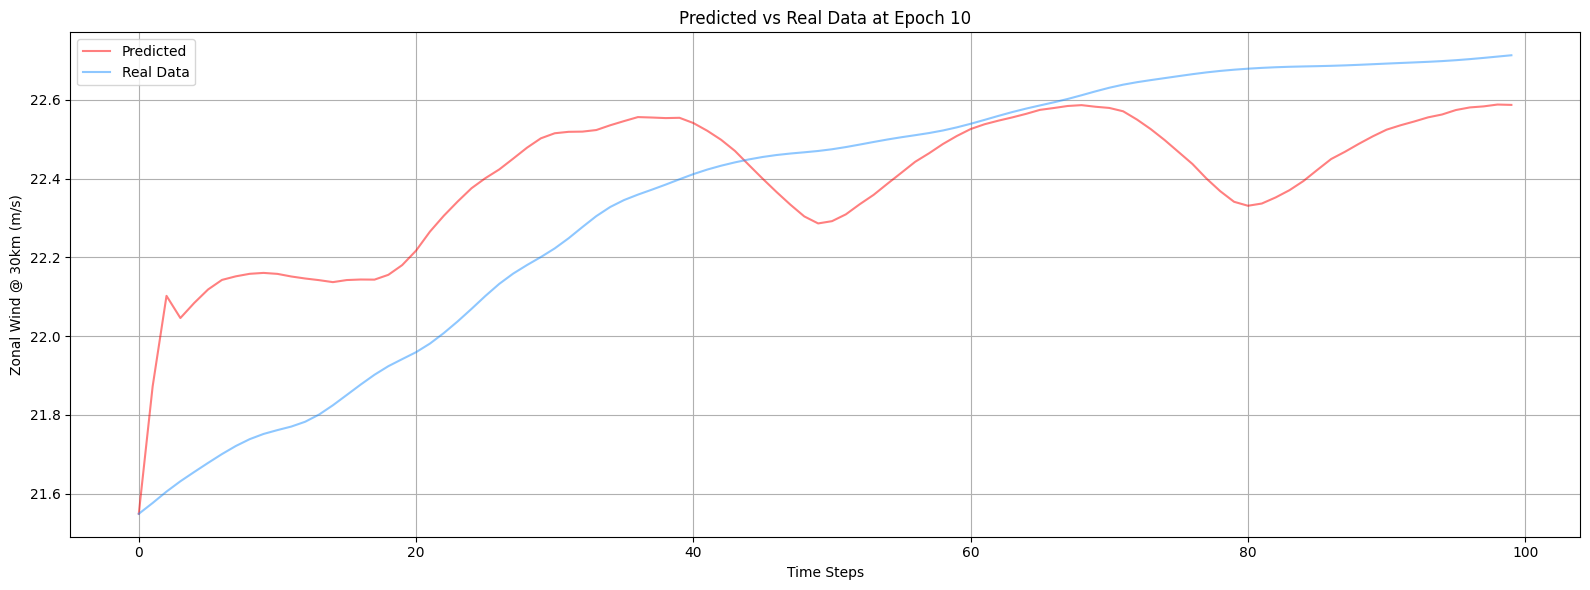

Epoch 12, 
        Reconstrunction Loss: 0.0011898619122803211

        Validation Reconstrunction Loss: 0.2791557312011719
Epoch 13, 
        Reconstrunction Loss: 0.0011792556615546346

        Validation Reconstrunction Loss: 0.2650734782218933


Mini Inference at Epoch 12: 100%|██████████| 99/99 [00:00<00:00, 1450.48it/s]


<Figure size 640x480 with 0 Axes>

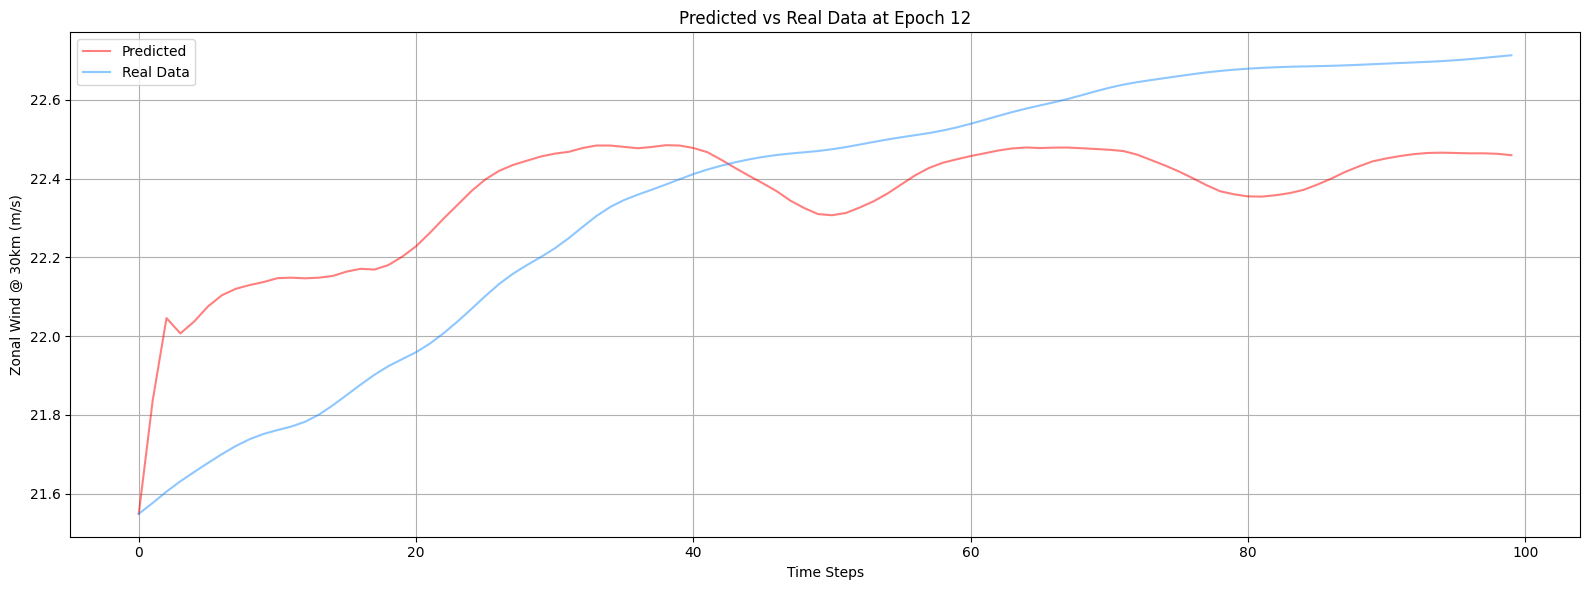

Epoch 14, 
        Reconstrunction Loss: 0.0011719072936102748

        Validation Reconstrunction Loss: 0.2520376741886139
Epoch 15, 
        Reconstrunction Loss: 0.001166306552477181

        Validation Reconstrunction Loss: 0.24011044204235077


Mini Inference at Epoch 14: 100%|██████████| 99/99 [00:00<00:00, 1423.60it/s]


<Figure size 640x480 with 0 Axes>

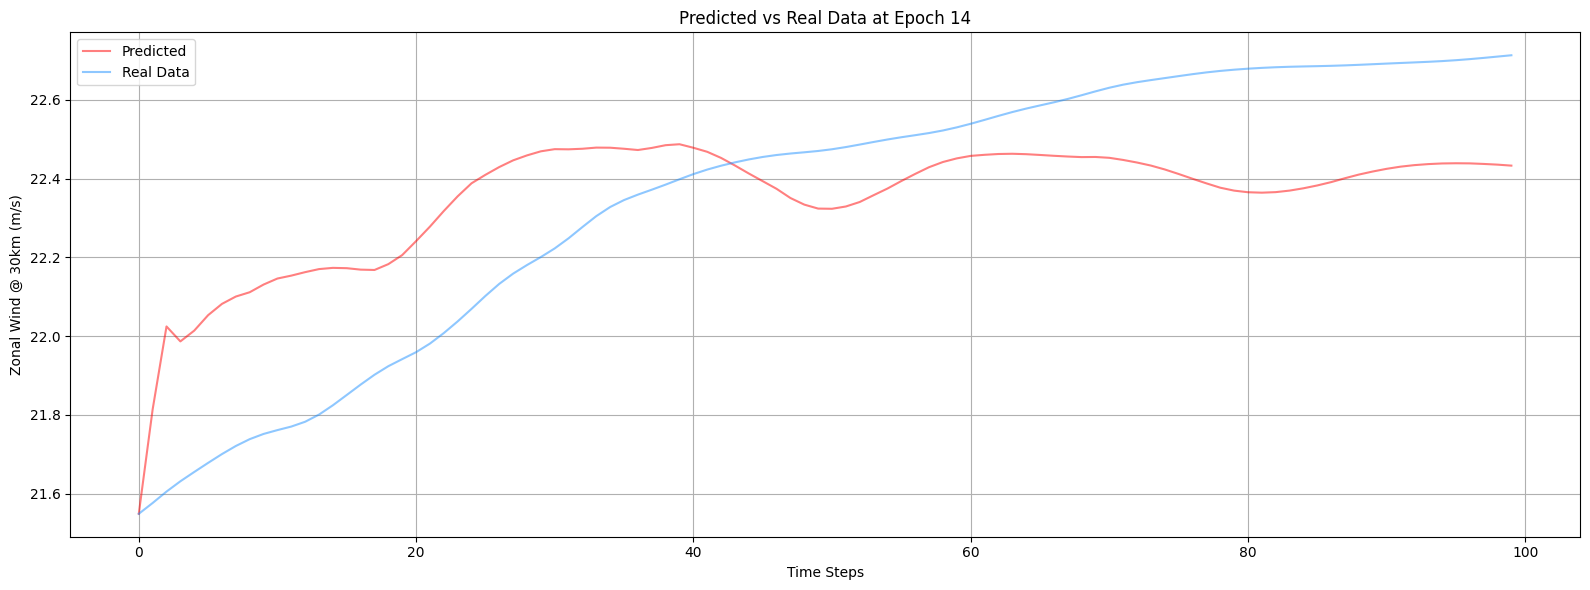

Epoch 16, 
        Reconstrunction Loss: 0.001161874388344586

        Validation Reconstrunction Loss: 0.2291031777858734
Epoch 17, 
        Reconstrunction Loss: 0.0011582549195736647

        Validation Reconstrunction Loss: 0.21898075938224792


Mini Inference at Epoch 16: 100%|██████████| 99/99 [00:00<00:00, 1373.08it/s]


<Figure size 640x480 with 0 Axes>

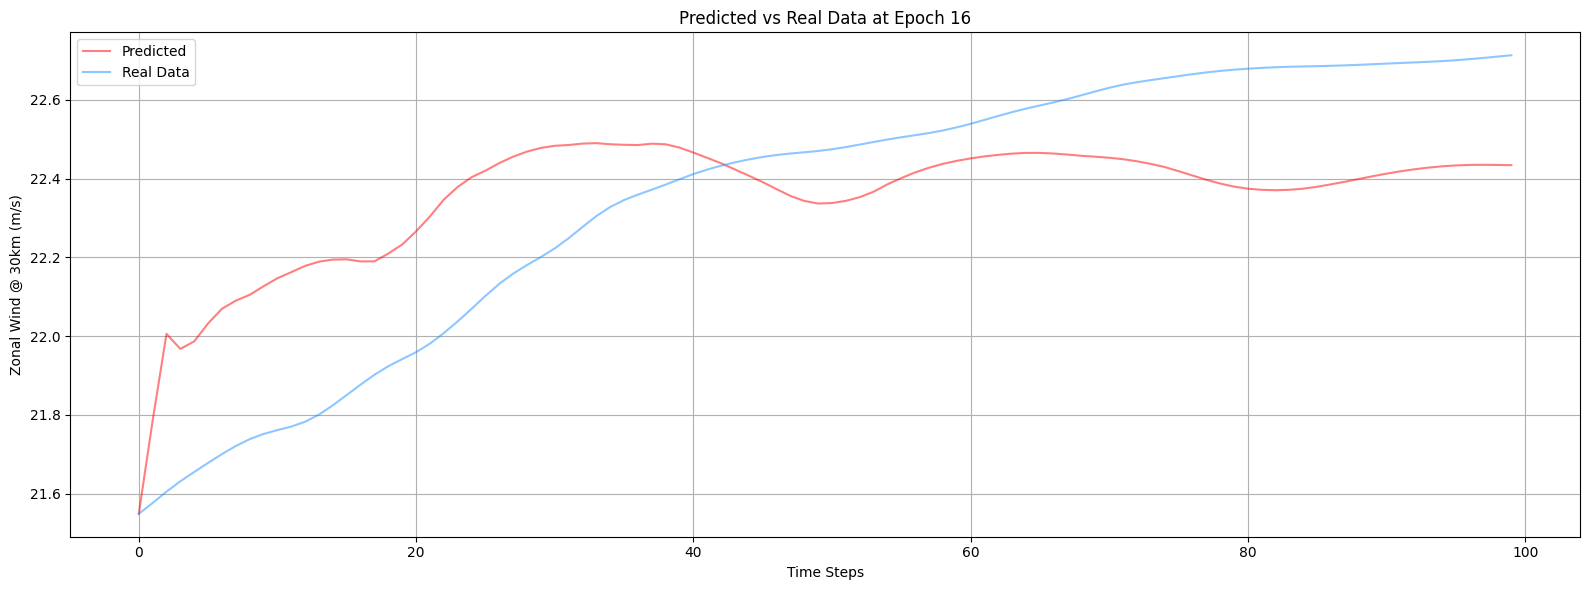

Epoch 18, 
        Reconstrunction Loss: 0.001155060133896768

        Validation Reconstrunction Loss: 0.20981933176517487
Epoch 19, 
        Reconstrunction Loss: 0.0011517328675836325

        Validation Reconstrunction Loss: 0.20150114595890045


Mini Inference at Epoch 18: 100%|██████████| 99/99 [00:00<00:00, 1314.24it/s]


<Figure size 640x480 with 0 Axes>

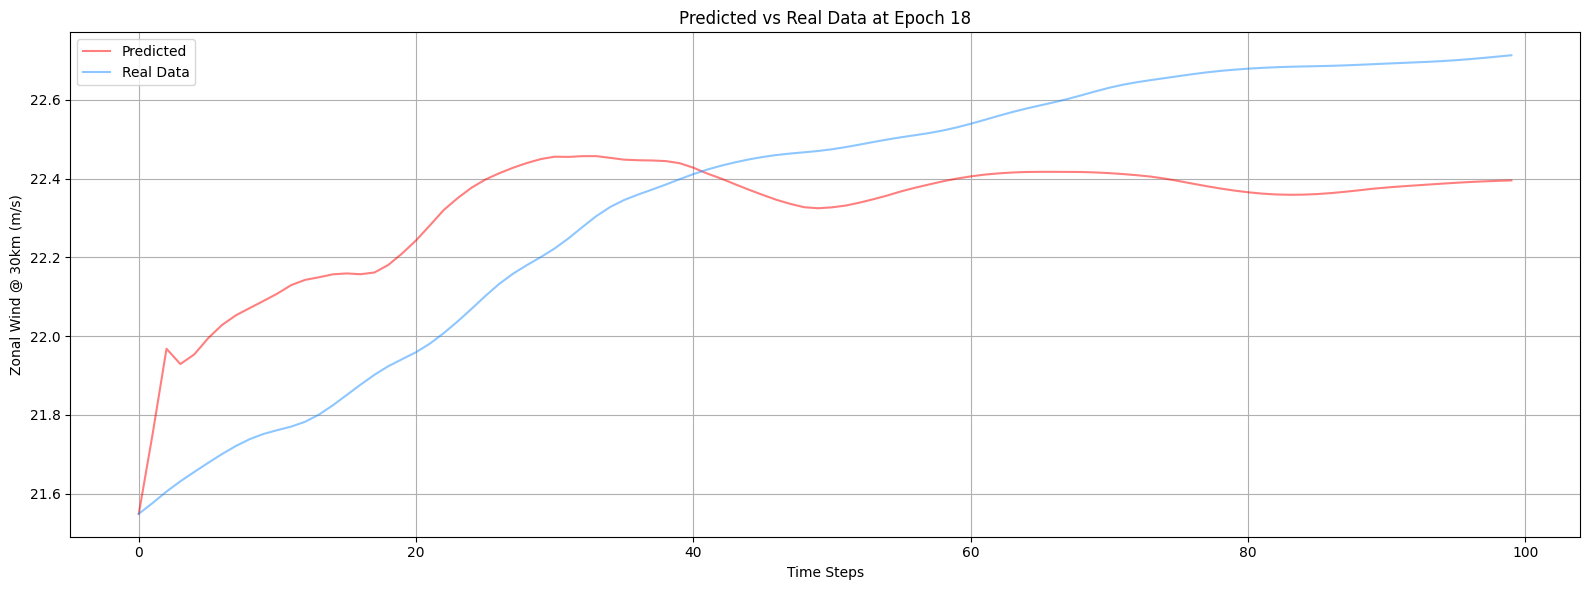

Epoch 20, 
        Reconstrunction Loss: 0.0011486535659059882

        Validation Reconstrunction Loss: 0.19406622648239136
Epoch 21, 
        Reconstrunction Loss: 0.0011456626234576106

        Validation Reconstrunction Loss: 0.18731750547885895


Mini Inference at Epoch 20: 100%|██████████| 99/99 [00:00<00:00, 1420.97it/s]


<Figure size 640x480 with 0 Axes>

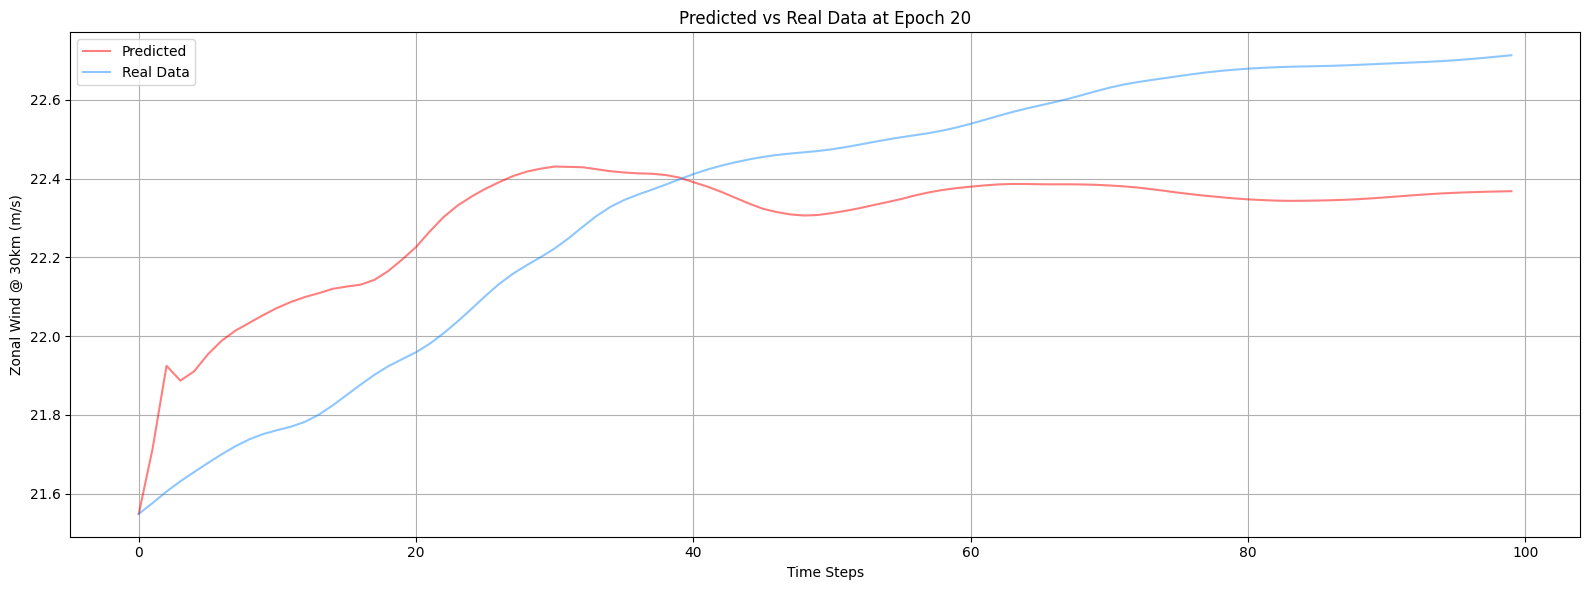

Epoch 22, 
        Reconstrunction Loss: 0.0011426776181906462

        Validation Reconstrunction Loss: 0.18120411038398743
Epoch 23, 
        Reconstrunction Loss: 0.0011401809751987457

        Validation Reconstrunction Loss: 0.1756523996591568


Mini Inference at Epoch 22: 100%|██████████| 99/99 [00:00<00:00, 1291.59it/s]


<Figure size 640x480 with 0 Axes>

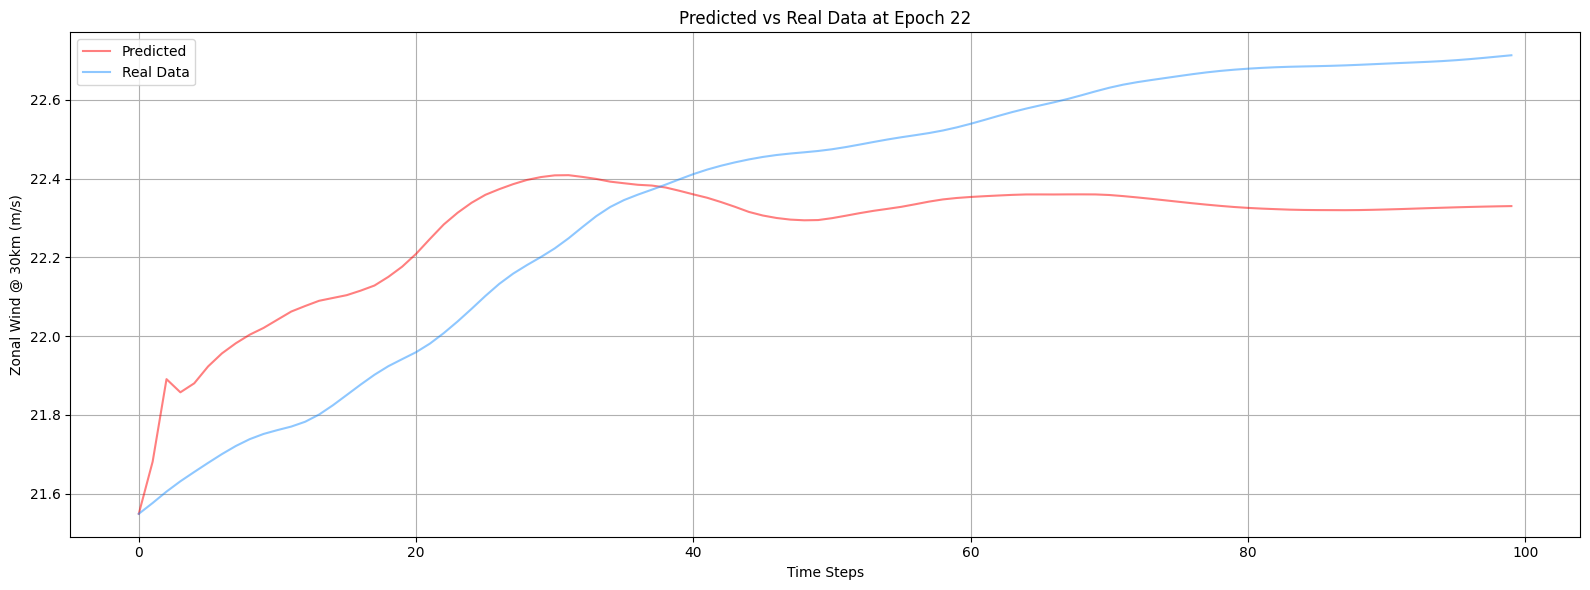

Epoch 24, 
        Reconstrunction Loss: 0.0011380211217328906

        Validation Reconstrunction Loss: 0.17064939439296722
Epoch 25, 
        Reconstrunction Loss: 0.0011355553288012743

        Validation Reconstrunction Loss: 0.16614754498004913


Mini Inference at Epoch 24: 100%|██████████| 99/99 [00:00<00:00, 1361.05it/s]


<Figure size 640x480 with 0 Axes>

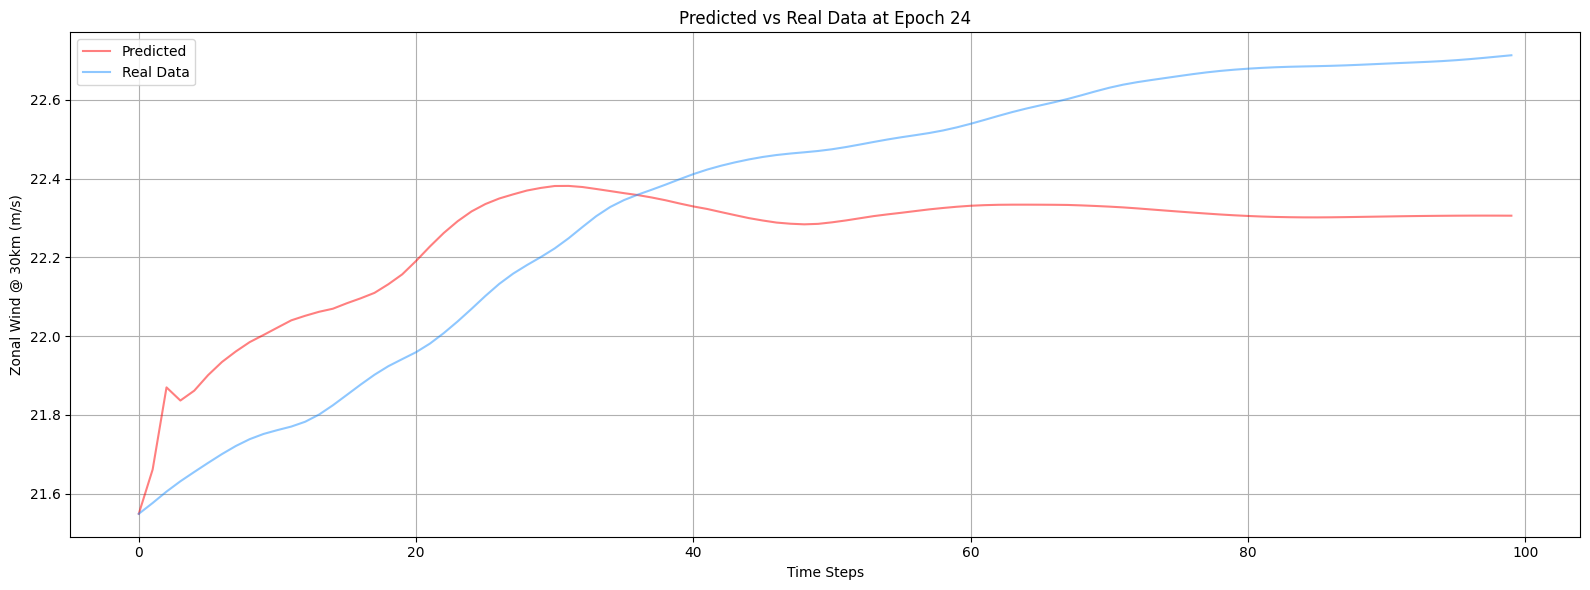

Epoch 26, 
        Reconstrunction Loss: 0.0011331733549013734

        Validation Reconstrunction Loss: 0.16212975978851318
Epoch 27, 
        Reconstrunction Loss: 0.0011309878900647163

        Validation Reconstrunction Loss: 0.1585293412208557


Mini Inference at Epoch 26: 100%|██████████| 99/99 [00:00<00:00, 1360.94it/s]


<Figure size 640x480 with 0 Axes>

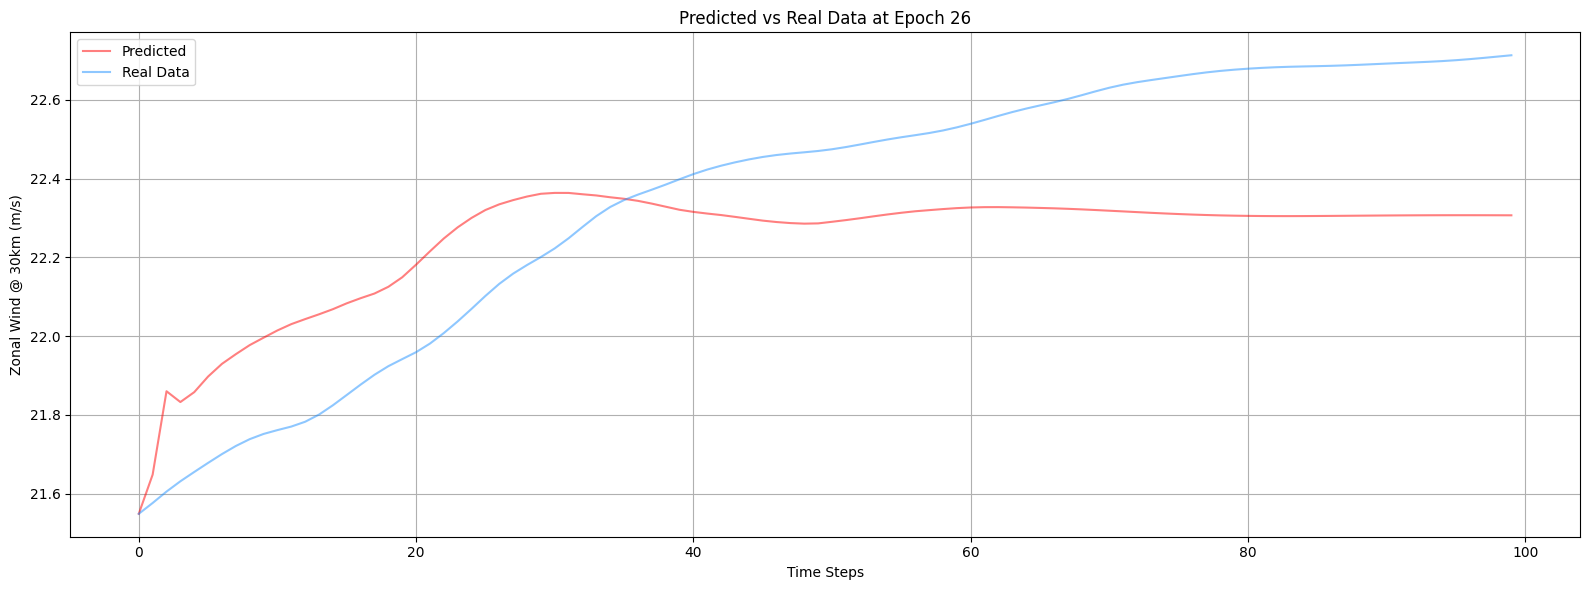

Epoch 28, 
        Reconstrunction Loss: 0.0011290039401501417

        Validation Reconstrunction Loss: 0.1552748680114746
Epoch 29, 
        Reconstrunction Loss: 0.00112727633677423

        Validation Reconstrunction Loss: 0.15226545929908752


Mini Inference at Epoch 28: 100%|██████████| 99/99 [00:00<00:00, 1393.21it/s]


<Figure size 640x480 with 0 Axes>

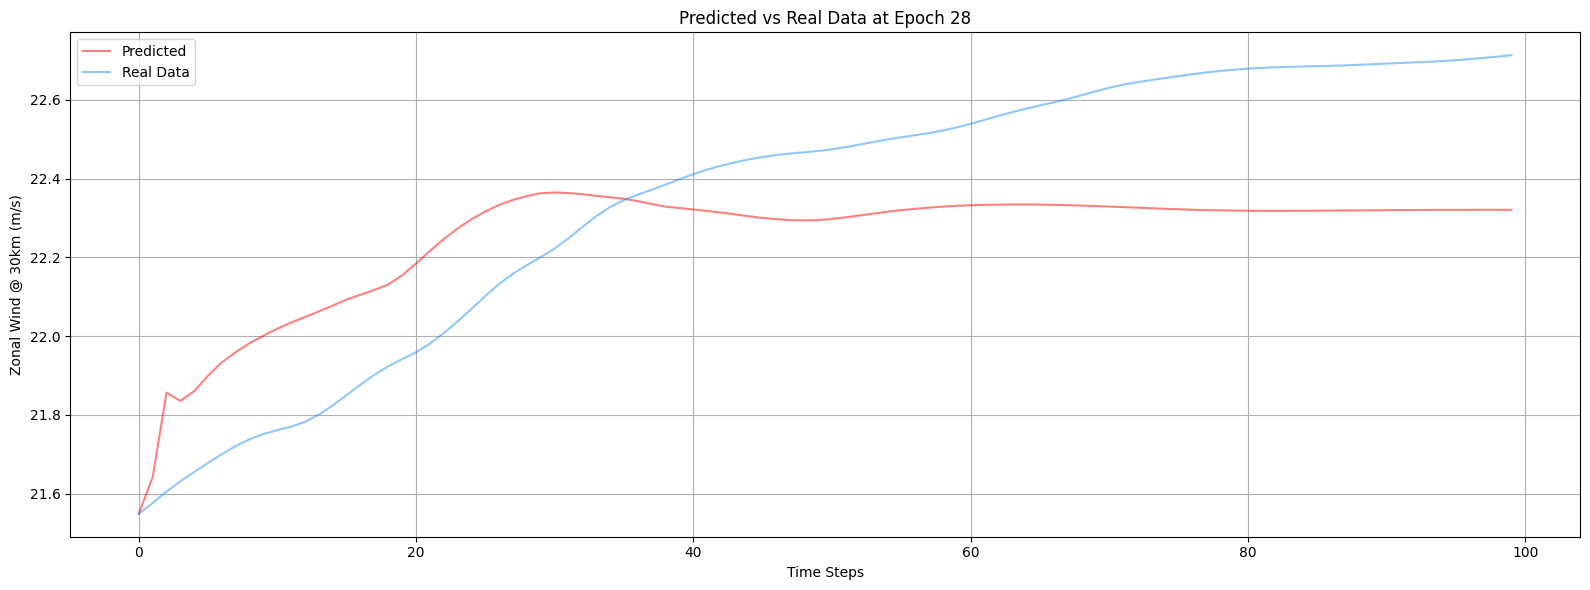

Epoch 30, 
        Reconstrunction Loss: 0.0011254188138991594

        Validation Reconstrunction Loss: 0.14954140782356262
Epoch 31, 
        Reconstrunction Loss: 0.0011237409198656678

        Validation Reconstrunction Loss: 0.1469637006521225


Mini Inference at Epoch 30: 100%|██████████| 99/99 [00:00<00:00, 1224.90it/s]


<Figure size 640x480 with 0 Axes>

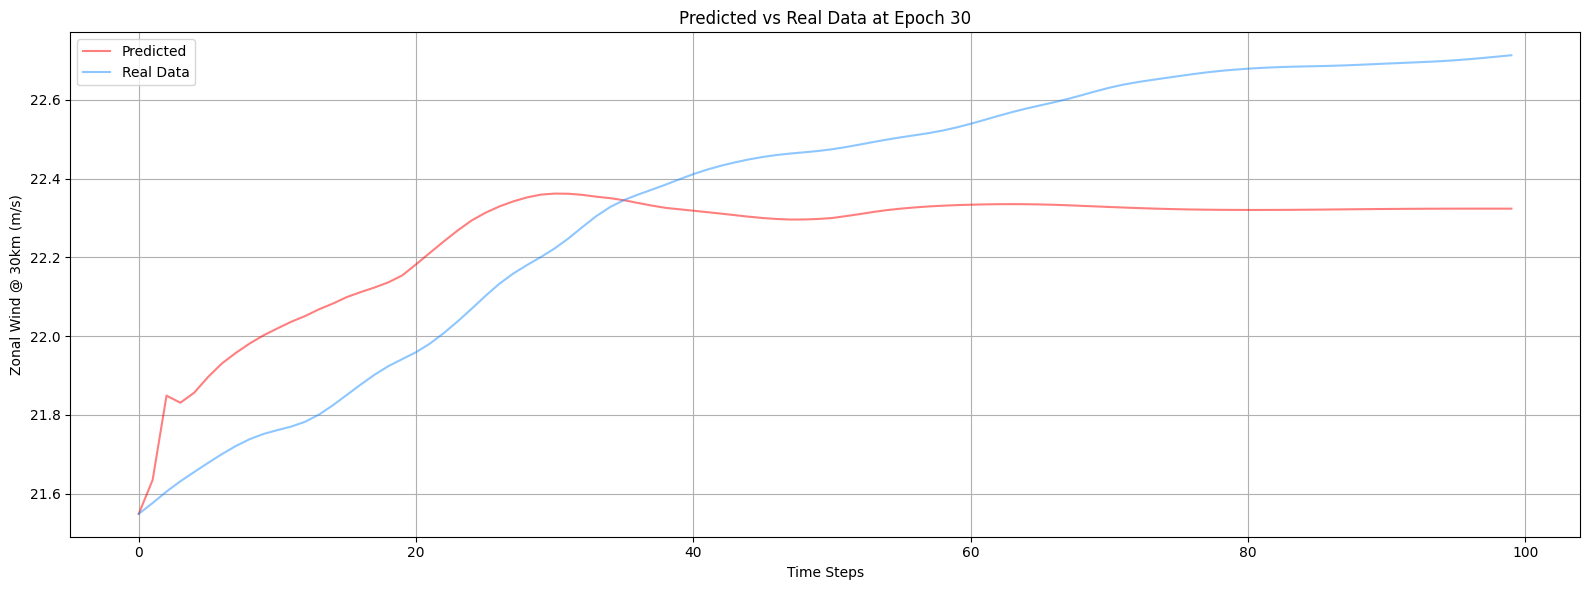

Epoch 32, 
        Reconstrunction Loss: 0.0011222095927223563

        Validation Reconstrunction Loss: 0.14455559849739075
Epoch 33, 
        Reconstrunction Loss: 0.0011206743074581027

        Validation Reconstrunction Loss: 0.14236485958099365


Mini Inference at Epoch 32: 100%|██████████| 99/99 [00:00<00:00, 974.20it/s]


<Figure size 640x480 with 0 Axes>

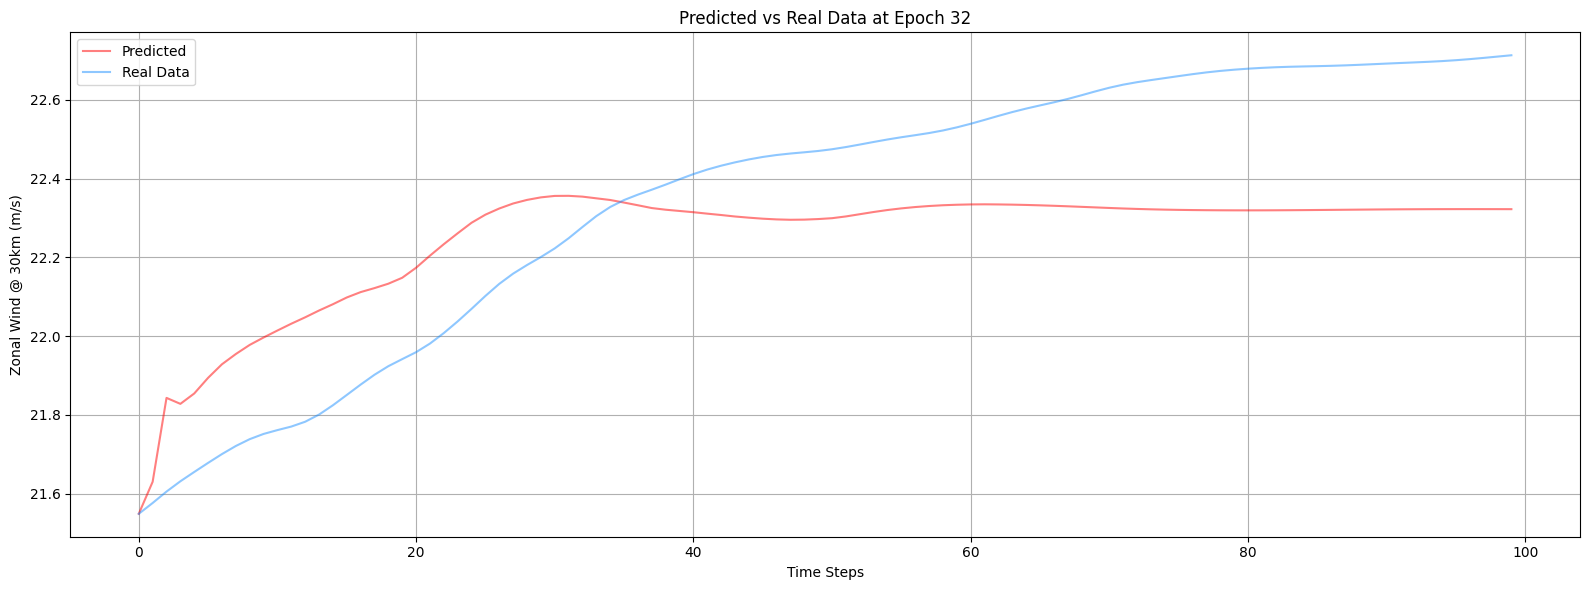

Epoch 34, 
        Reconstrunction Loss: 0.0011191988596692681

        Validation Reconstrunction Loss: 0.14029711484909058
Epoch 35, 
        Reconstrunction Loss: 0.001117827370762825

        Validation Reconstrunction Loss: 0.13840807974338531


Mini Inference at Epoch 34: 100%|██████████| 99/99 [00:00<00:00, 870.51it/s]


<Figure size 640x480 with 0 Axes>

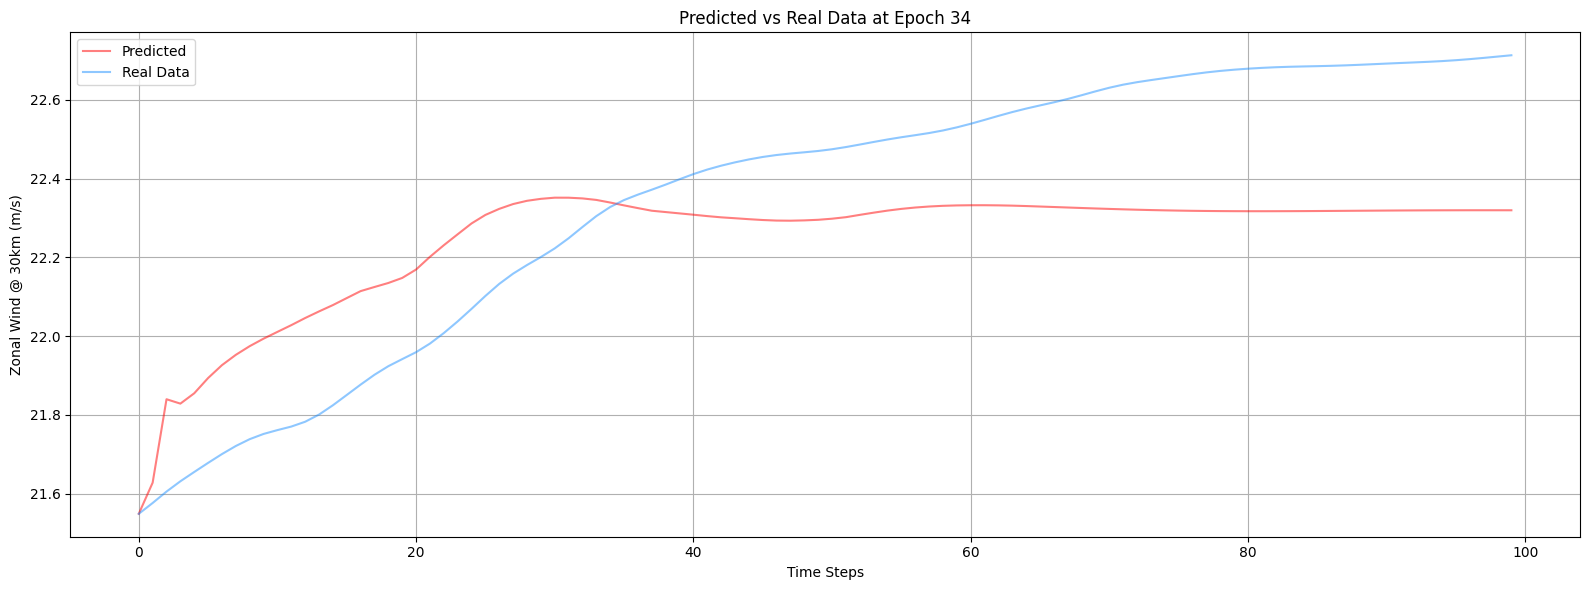

Epoch 36, 
        Reconstrunction Loss: 0.0011163662420585752

        Validation Reconstrunction Loss: 0.13661734759807587
Epoch 37, 
        Reconstrunction Loss: 0.00111510104034096

        Validation Reconstrunction Loss: 0.13491356372833252


Mini Inference at Epoch 36: 100%|██████████| 99/99 [00:00<00:00, 1253.93it/s]


<Figure size 640x480 with 0 Axes>

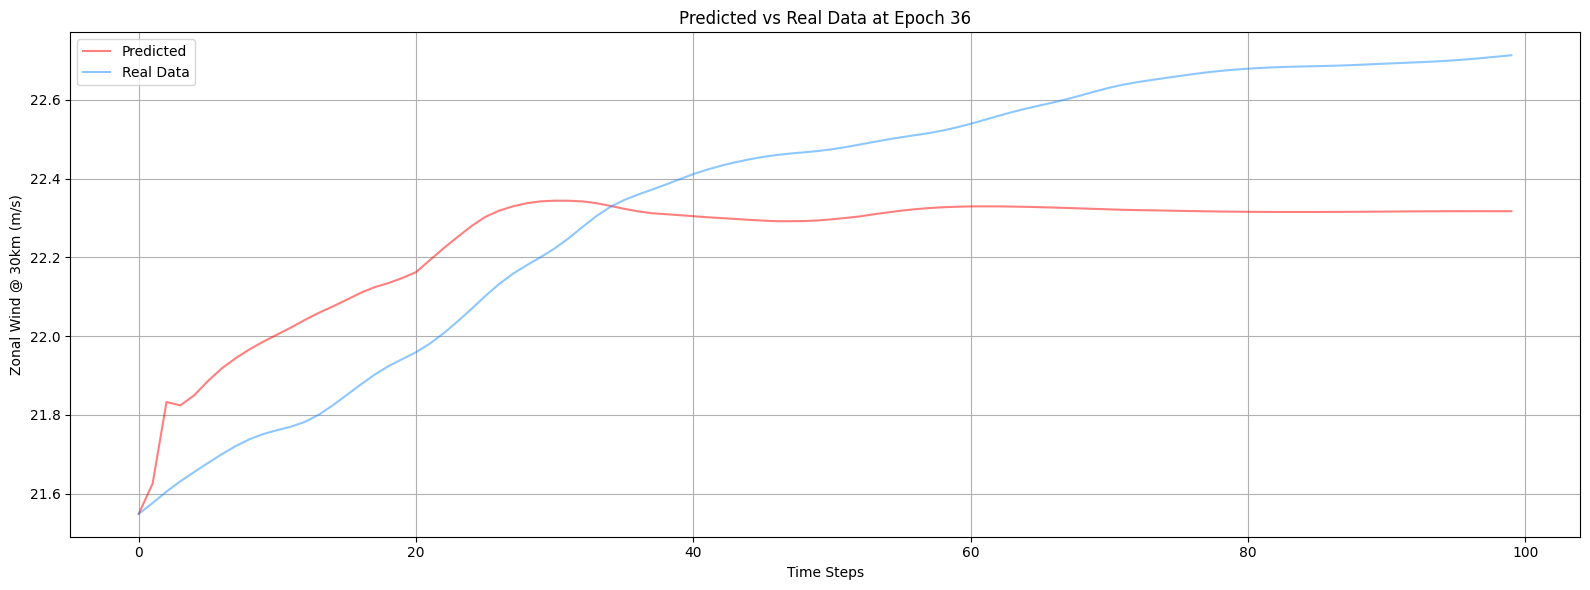

Epoch 38, 
        Reconstrunction Loss: 0.0011137595865875483

        Validation Reconstrunction Loss: 0.1332639753818512
Epoch 39, 
        Reconstrunction Loss: 0.0011124953161925077

        Validation Reconstrunction Loss: 0.13173051178455353


Mini Inference at Epoch 38: 100%|██████████| 99/99 [00:00<00:00, 1285.78it/s]


<Figure size 640x480 with 0 Axes>

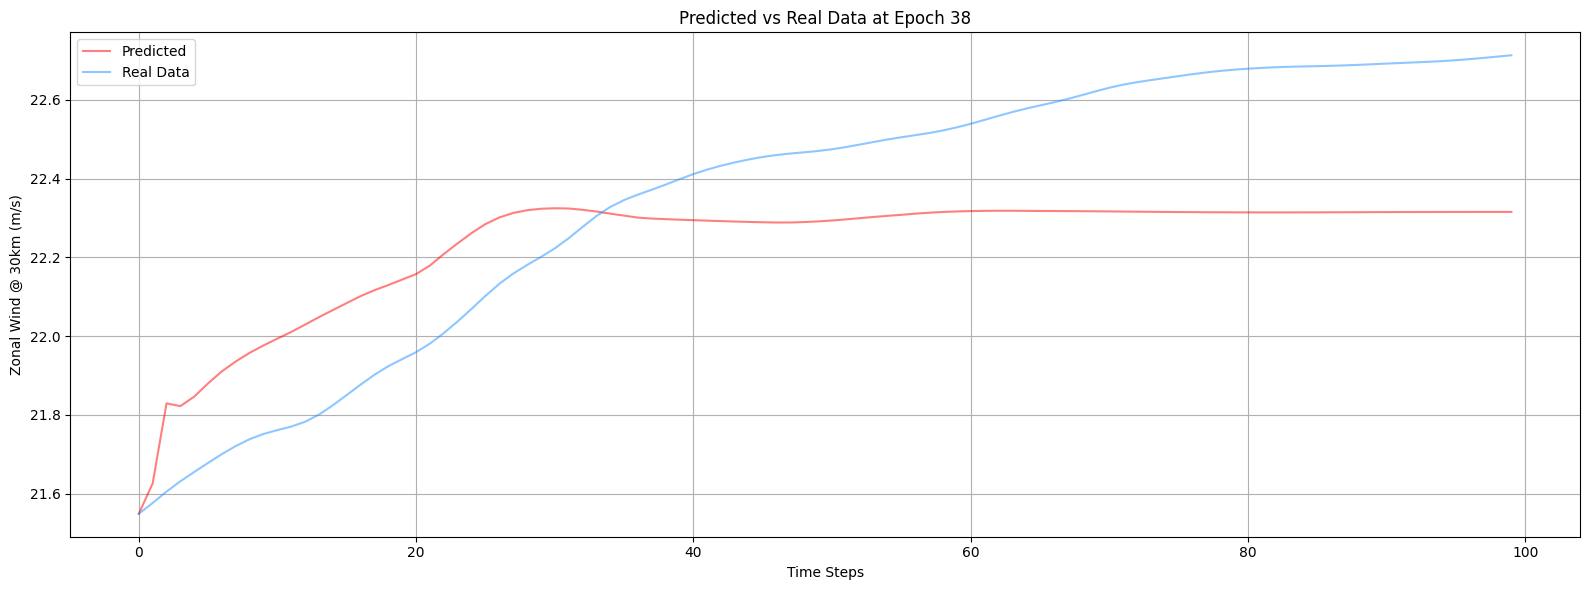

Epoch 40, 
        Reconstrunction Loss: 0.0011113546788692474

        Validation Reconstrunction Loss: 0.13025601208209991
Epoch 41, 
        Reconstrunction Loss: 0.0011101935524493456

        Validation Reconstrunction Loss: 0.1288294643163681


Mini Inference at Epoch 40: 100%|██████████| 99/99 [00:00<00:00, 1223.15it/s]


<Figure size 640x480 with 0 Axes>

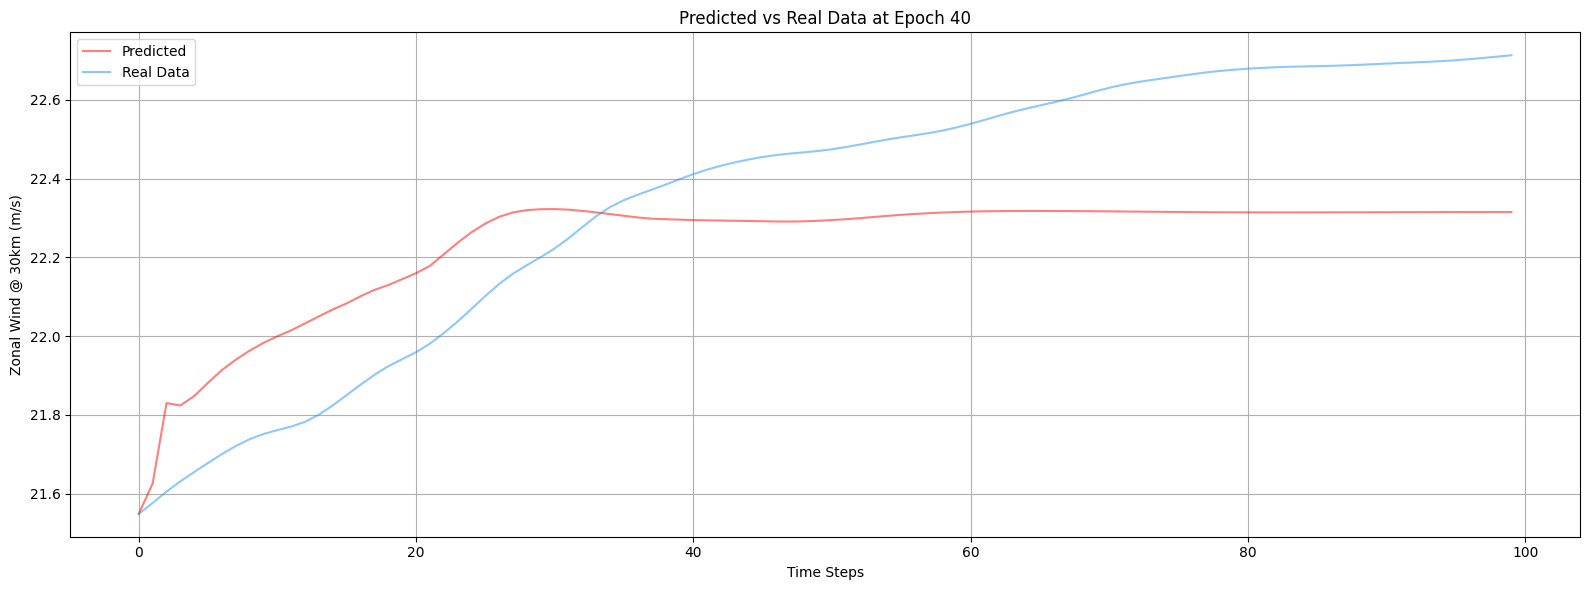

Epoch 42, 
        Reconstrunction Loss: 0.0011091707274317741

        Validation Reconstrunction Loss: 0.12746256589889526
Epoch 43, 
        Reconstrunction Loss: 0.0011082054115831852

        Validation Reconstrunction Loss: 0.12613554298877716


Mini Inference at Epoch 42: 100%|██████████| 99/99 [00:00<00:00, 1367.78it/s]


<Figure size 640x480 with 0 Axes>

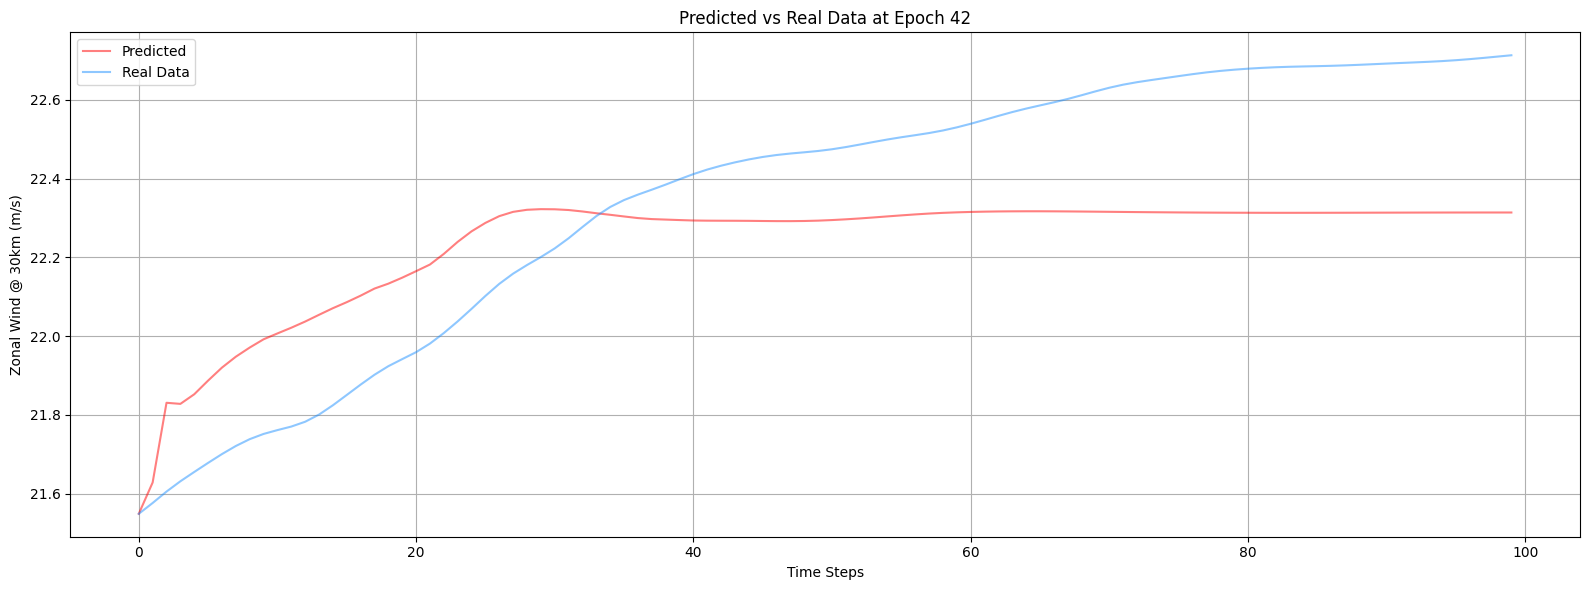

Epoch 44, 
        Reconstrunction Loss: 0.001107284682802856

        Validation Reconstrunction Loss: 0.12489881366491318
Epoch 45, 
        Reconstrunction Loss: 0.0011063161073252559

        Validation Reconstrunction Loss: 0.12365327030420303


Mini Inference at Epoch 44: 100%|██████████| 99/99 [00:00<00:00, 875.80it/s]


<Figure size 640x480 with 0 Axes>

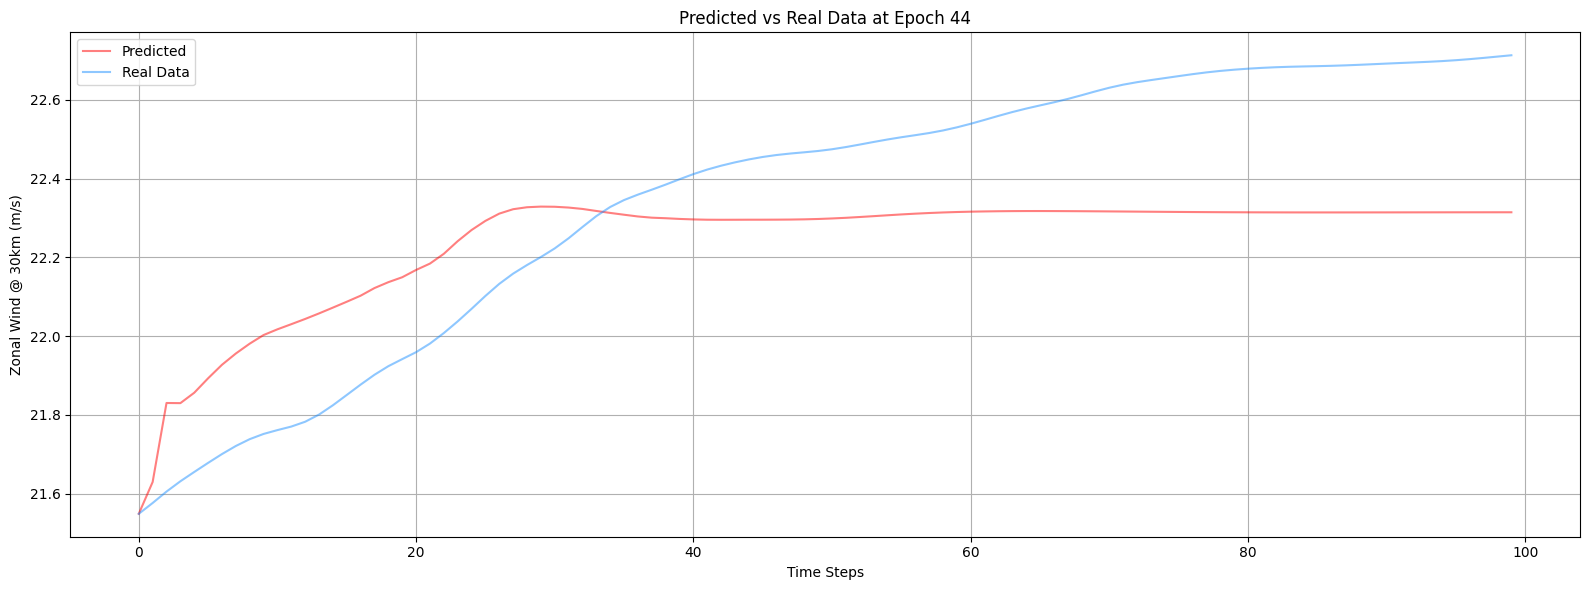

Epoch 46, 
        Reconstrunction Loss: 0.001105399918742478

        Validation Reconstrunction Loss: 0.1224711462855339
Epoch 47, 
        Reconstrunction Loss: 0.0011045591672882438

        Validation Reconstrunction Loss: 0.12133371084928513


Mini Inference at Epoch 46: 100%|██████████| 99/99 [00:00<00:00, 633.70it/s]


<Figure size 640x480 with 0 Axes>

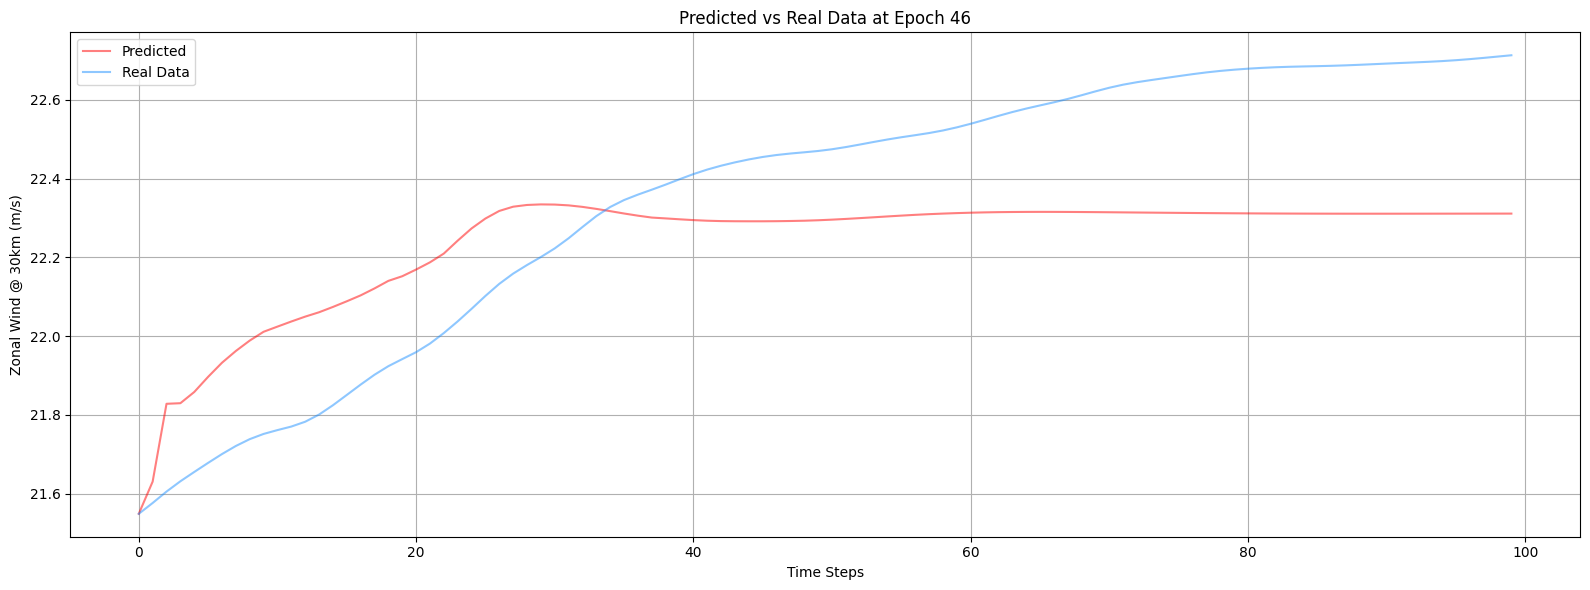

Epoch 48, 
        Reconstrunction Loss: 0.001103631453588605

        Validation Reconstrunction Loss: 0.12023855745792389
Epoch 49, 
        Reconstrunction Loss: 0.0011028664885088801

        Validation Reconstrunction Loss: 0.11922352015972137


Mini Inference at Epoch 48: 100%|██████████| 99/99 [00:00<00:00, 1116.79it/s]


<Figure size 640x480 with 0 Axes>

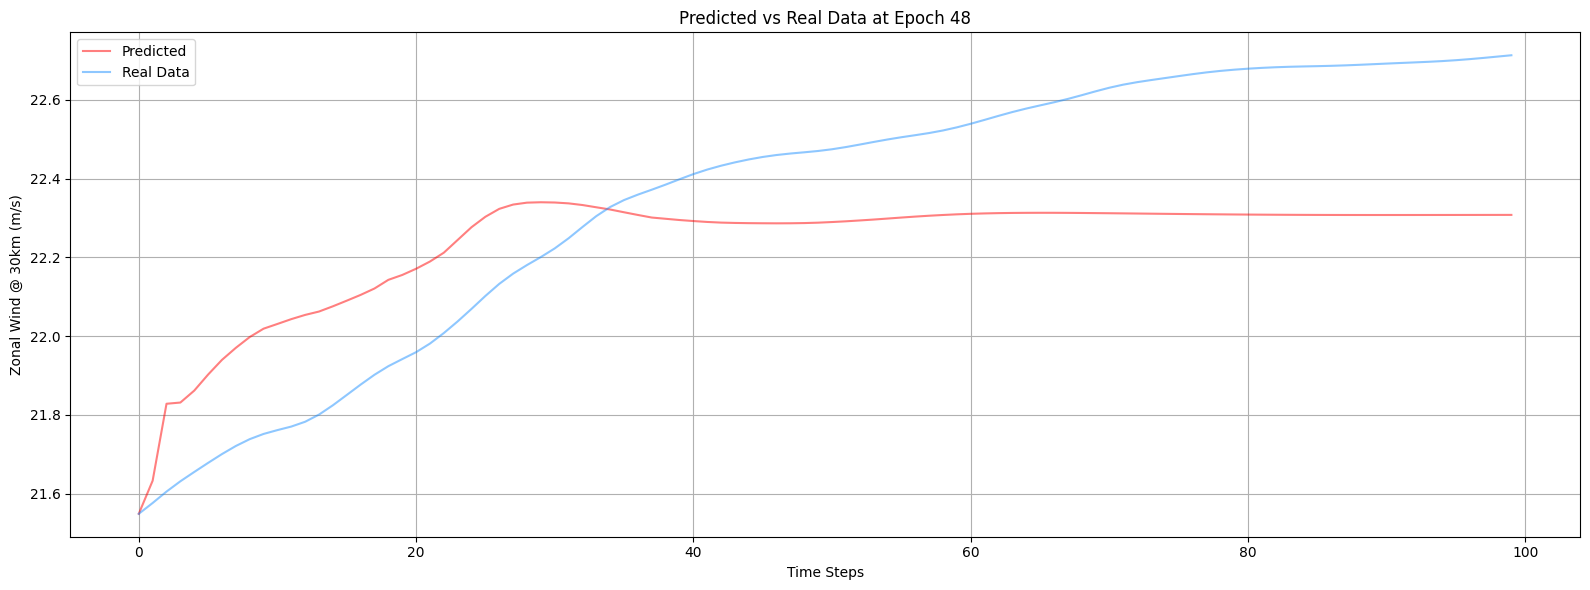

Epoch 50, 
        Reconstrunction Loss: 0.0011021529790014029

        Validation Reconstrunction Loss: 0.11822952330112457
Epoch 51, 
        Reconstrunction Loss: 0.0011014684569090605

        Validation Reconstrunction Loss: 0.11726666241884232


Mini Inference at Epoch 50: 100%|██████████| 99/99 [00:00<00:00, 1134.03it/s]


<Figure size 640x480 with 0 Axes>

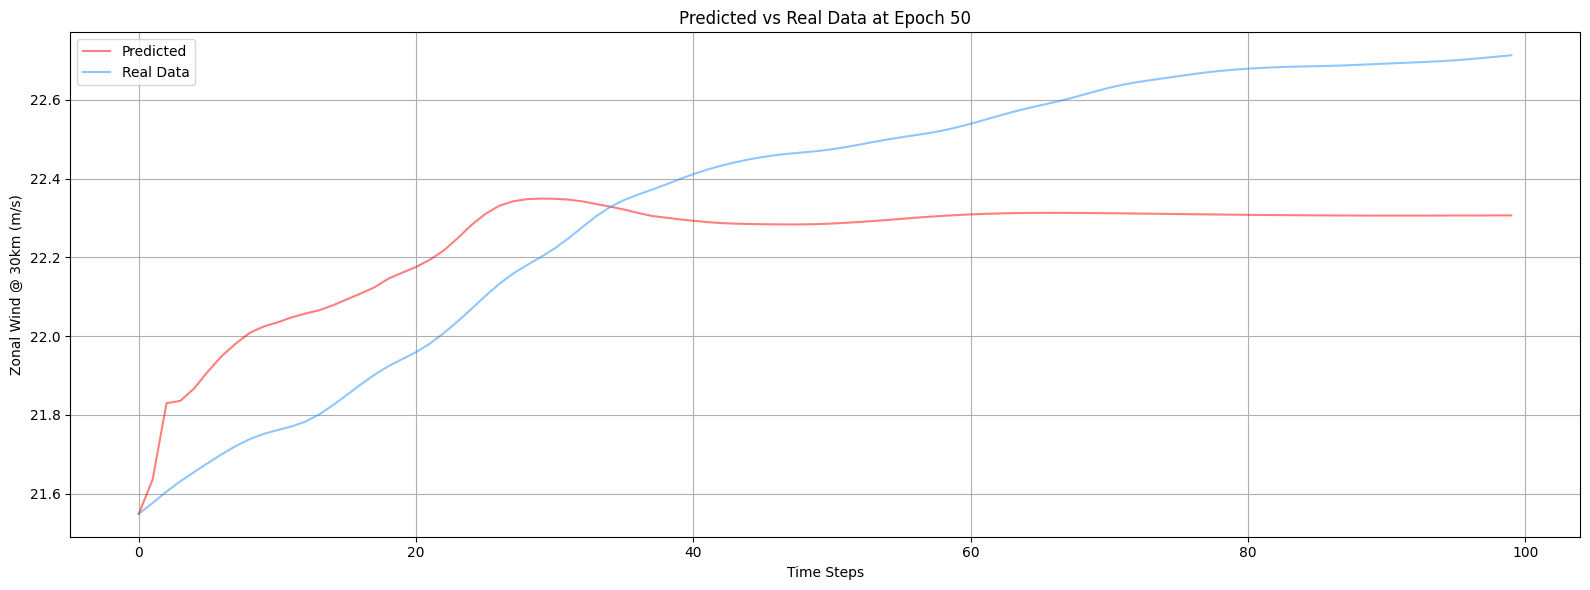

Epoch 52, 
        Reconstrunction Loss: 0.0011009664740413427

        Validation Reconstrunction Loss: 0.11636482924222946
Epoch 53, 
        Reconstrunction Loss: 0.0011003881227225065

        Validation Reconstrunction Loss: 0.11547987908124924


Mini Inference at Epoch 52: 100%|██████████| 99/99 [00:00<00:00, 1009.86it/s]


<Figure size 640x480 with 0 Axes>

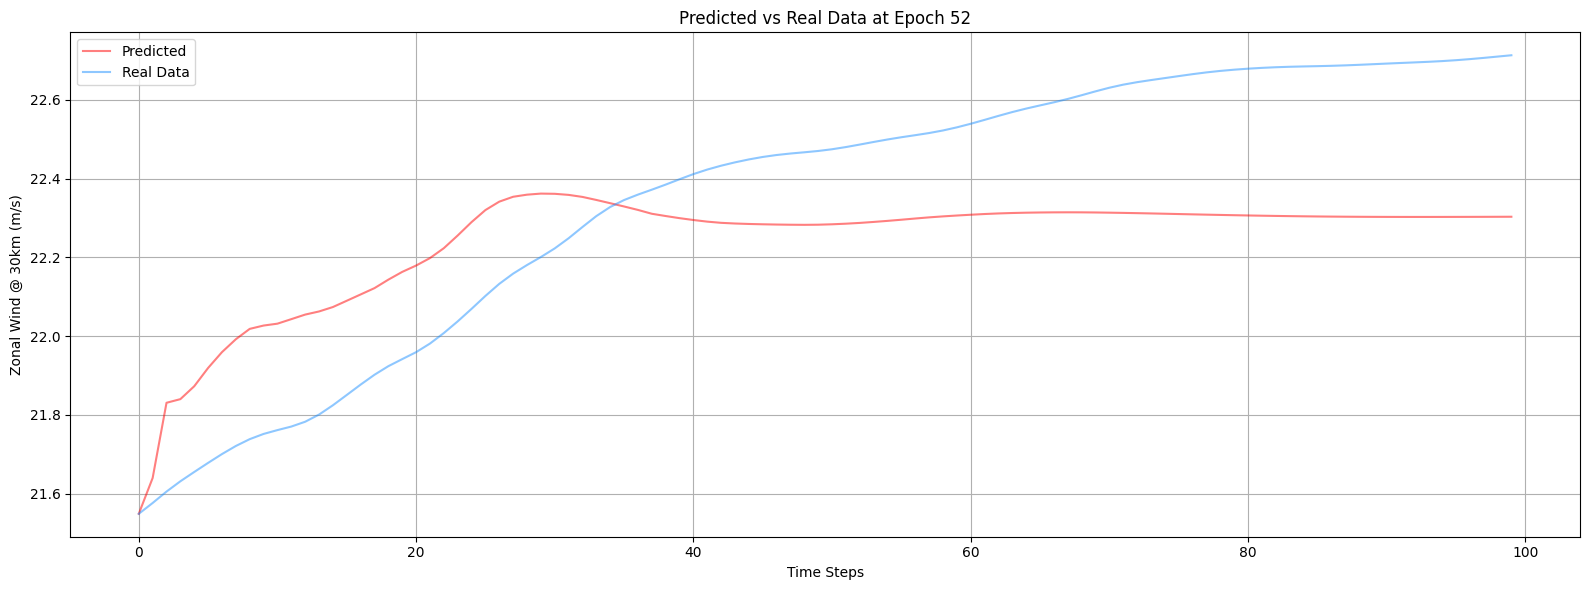

Epoch 54, 
        Reconstrunction Loss: 0.0010997876524925232

        Validation Reconstrunction Loss: 0.11461633443832397
Epoch 55, 
        Reconstrunction Loss: 0.0010995549382641912

        Validation Reconstrunction Loss: 0.11381031572818756


Mini Inference at Epoch 54: 100%|██████████| 99/99 [00:00<00:00, 1339.99it/s]


<Figure size 640x480 with 0 Axes>

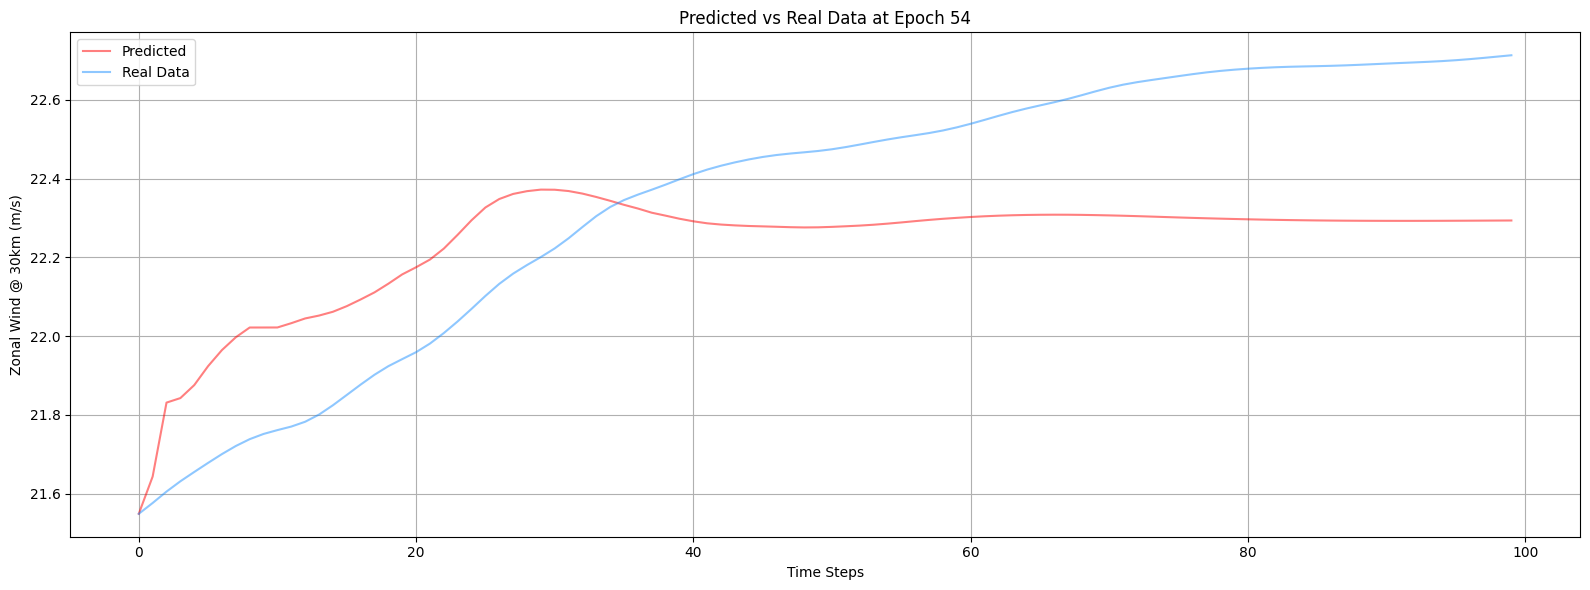

Epoch 56, 
        Reconstrunction Loss: 0.0010987719288095832

        Validation Reconstrunction Loss: 0.11301448196172714
Epoch 57, 
        Reconstrunction Loss: 0.00109864491969347

        Validation Reconstrunction Loss: 0.1122308298945427


Mini Inference at Epoch 56: 100%|██████████| 99/99 [00:00<00:00, 1027.76it/s]


<Figure size 640x480 with 0 Axes>

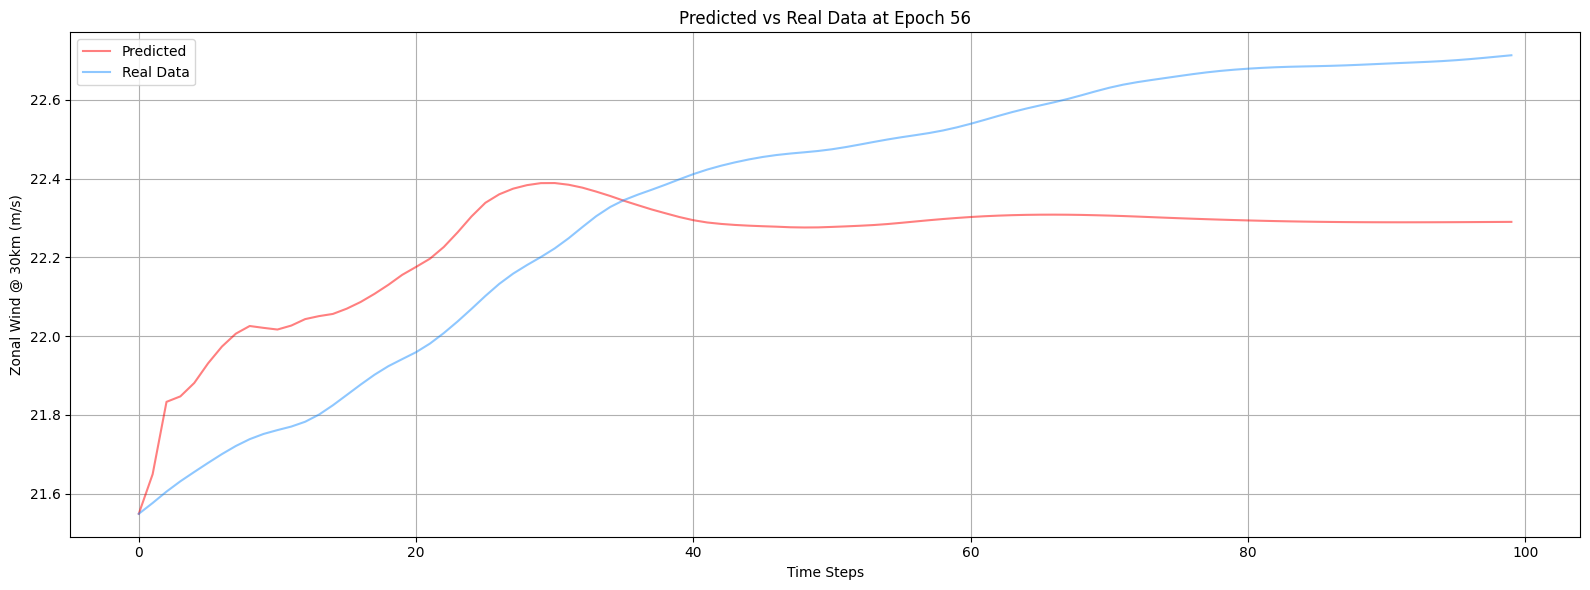

Epoch 58, 
        Reconstrunction Loss: 0.0010980847291648388

        Validation Reconstrunction Loss: 0.11148793250322342
Epoch 59, 
        Reconstrunction Loss: 0.0010976267512887716

        Validation Reconstrunction Loss: 0.11074431985616684


Mini Inference at Epoch 58: 100%|██████████| 99/99 [00:00<00:00, 1274.87it/s]


<Figure size 640x480 with 0 Axes>

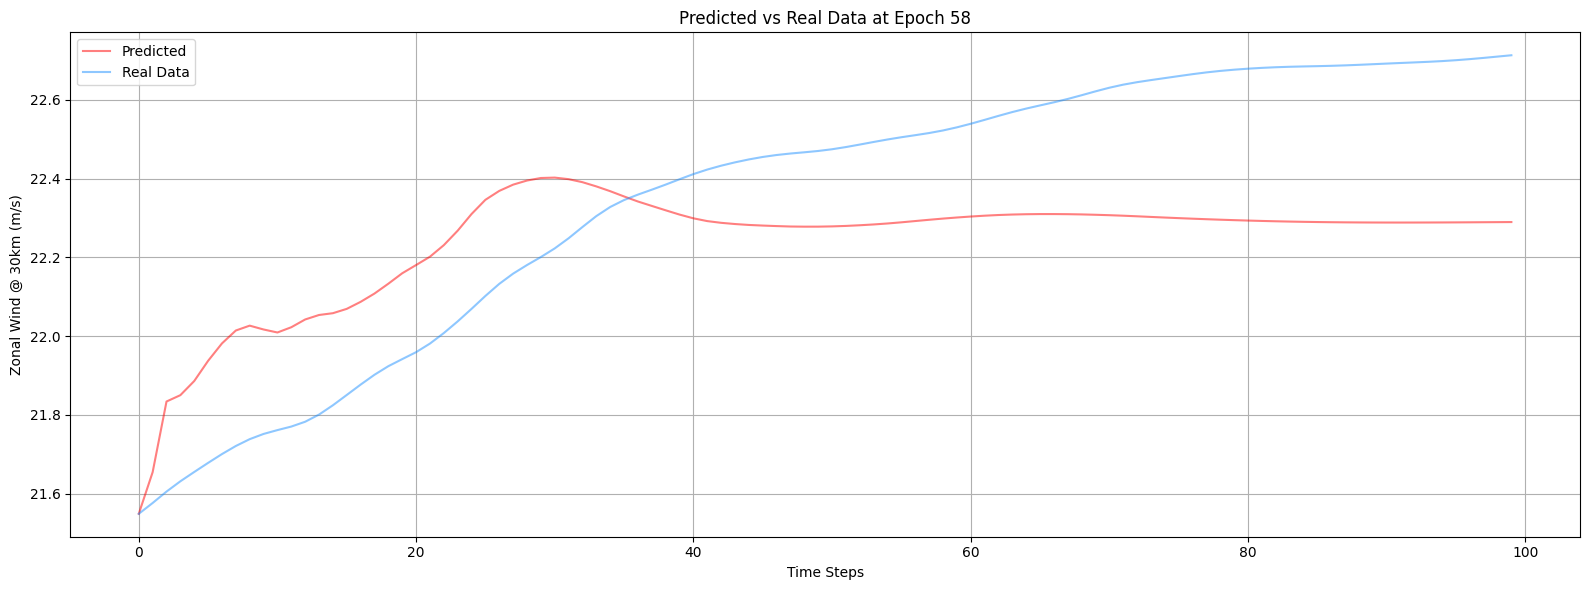

Epoch 60, 
        Reconstrunction Loss: 0.0010972009040415287

        Validation Reconstrunction Loss: 0.11002779006958008
Epoch 61, 
        Reconstrunction Loss: 0.0010967020643875003

        Validation Reconstrunction Loss: 0.10930351912975311


Mini Inference at Epoch 60: 100%|██████████| 99/99 [00:00<00:00, 1400.66it/s]


<Figure size 640x480 with 0 Axes>

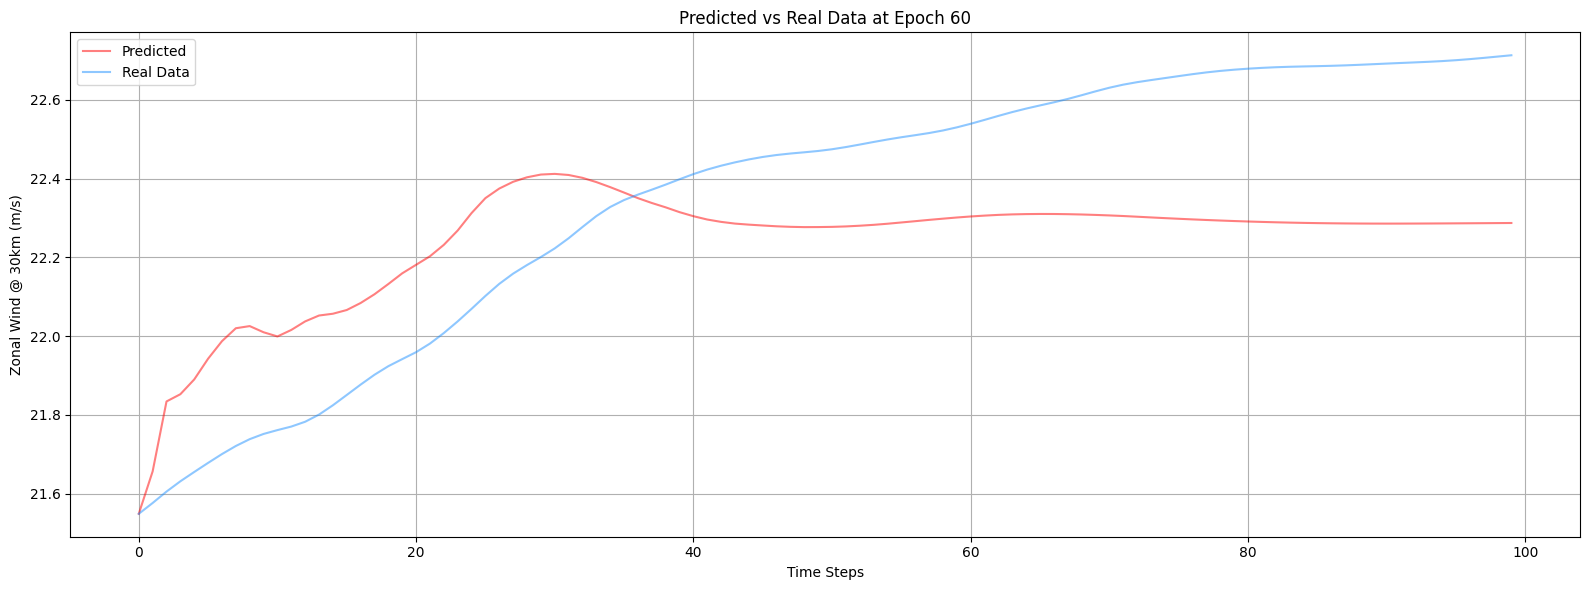

Epoch 62, 
        Reconstrunction Loss: 0.001096394145861268

        Validation Reconstrunction Loss: 0.10862825810909271
Epoch 63, 
        Reconstrunction Loss: 0.0010961663210764527

        Validation Reconstrunction Loss: 0.10796171426773071


Mini Inference at Epoch 62: 100%|██████████| 99/99 [00:00<00:00, 915.36it/s]


<Figure size 640x480 with 0 Axes>

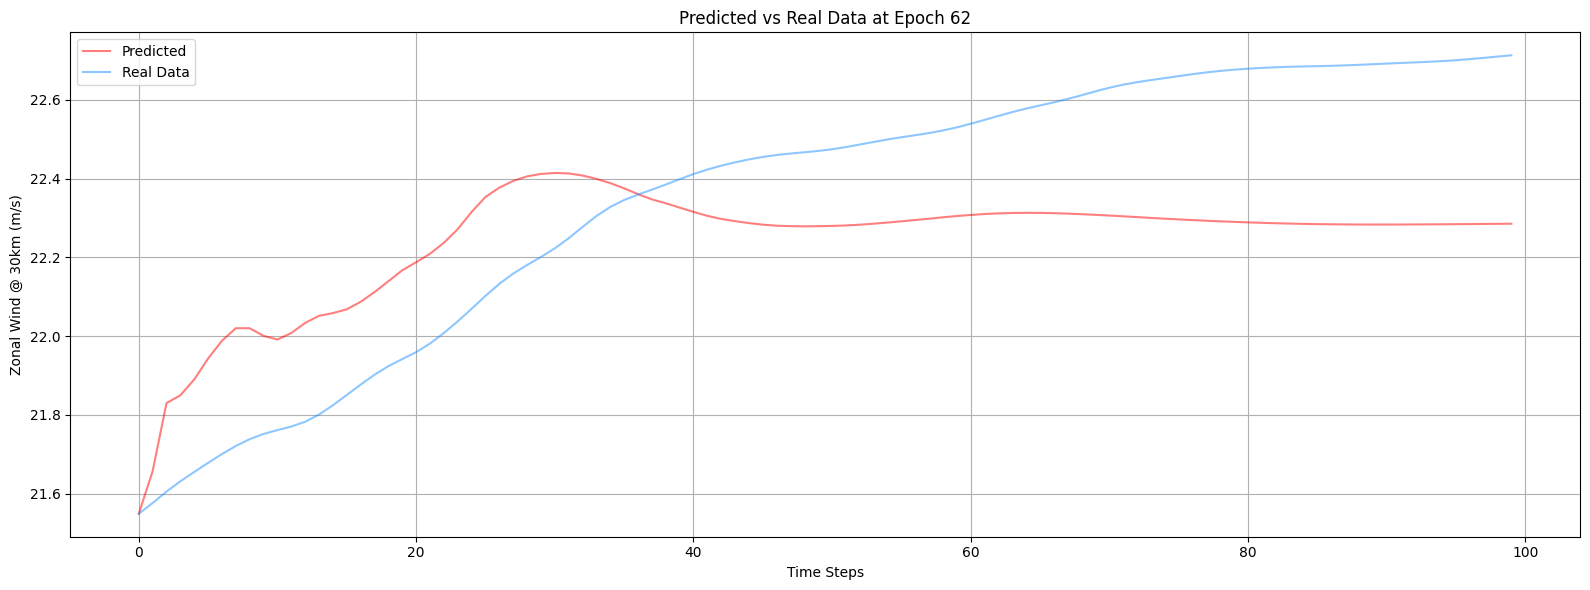

Epoch 64, 
        Reconstrunction Loss: 0.0010958969360217452

        Validation Reconstrunction Loss: 0.10734415054321289
Epoch 65, 
        Reconstrunction Loss: 0.0010955907637253404

        Validation Reconstrunction Loss: 0.10673027485609055


Mini Inference at Epoch 64: 100%|██████████| 99/99 [00:00<00:00, 1122.10it/s]


<Figure size 640x480 with 0 Axes>

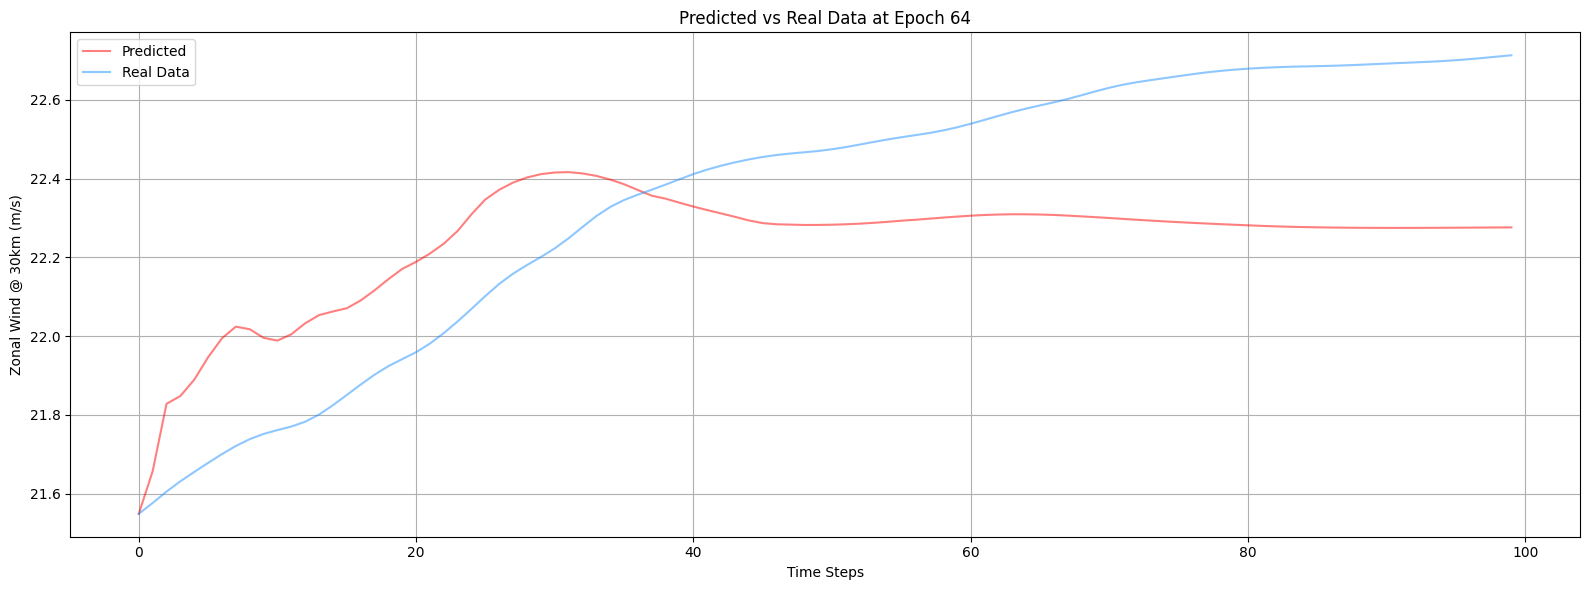

Epoch 66, 
        Reconstrunction Loss: 0.001095280982553959

        Validation Reconstrunction Loss: 0.10614311695098877
Epoch 67, 
        Reconstrunction Loss: 0.001094937790185213

        Validation Reconstrunction Loss: 0.10556557029485703


Mini Inference at Epoch 66: 100%|██████████| 99/99 [00:00<00:00, 1006.63it/s]


<Figure size 640x480 with 0 Axes>

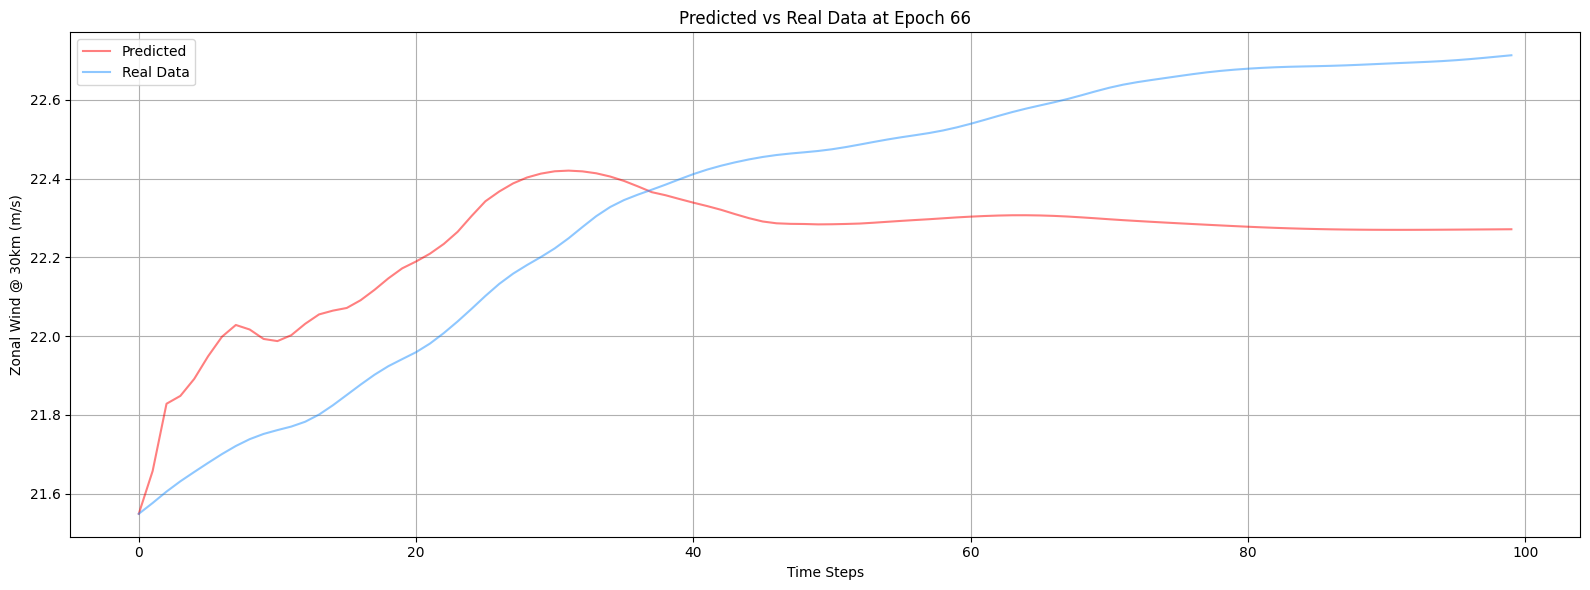

Epoch 68, 
        Reconstrunction Loss: 0.001094614272005856

        Validation Reconstrunction Loss: 0.10499992221593857
Epoch 69, 
        Reconstrunction Loss: 0.001094388891942799

        Validation Reconstrunction Loss: 0.10447555780410767


Mini Inference at Epoch 68: 100%|██████████| 99/99 [00:00<00:00, 1056.28it/s]


<Figure size 640x480 with 0 Axes>

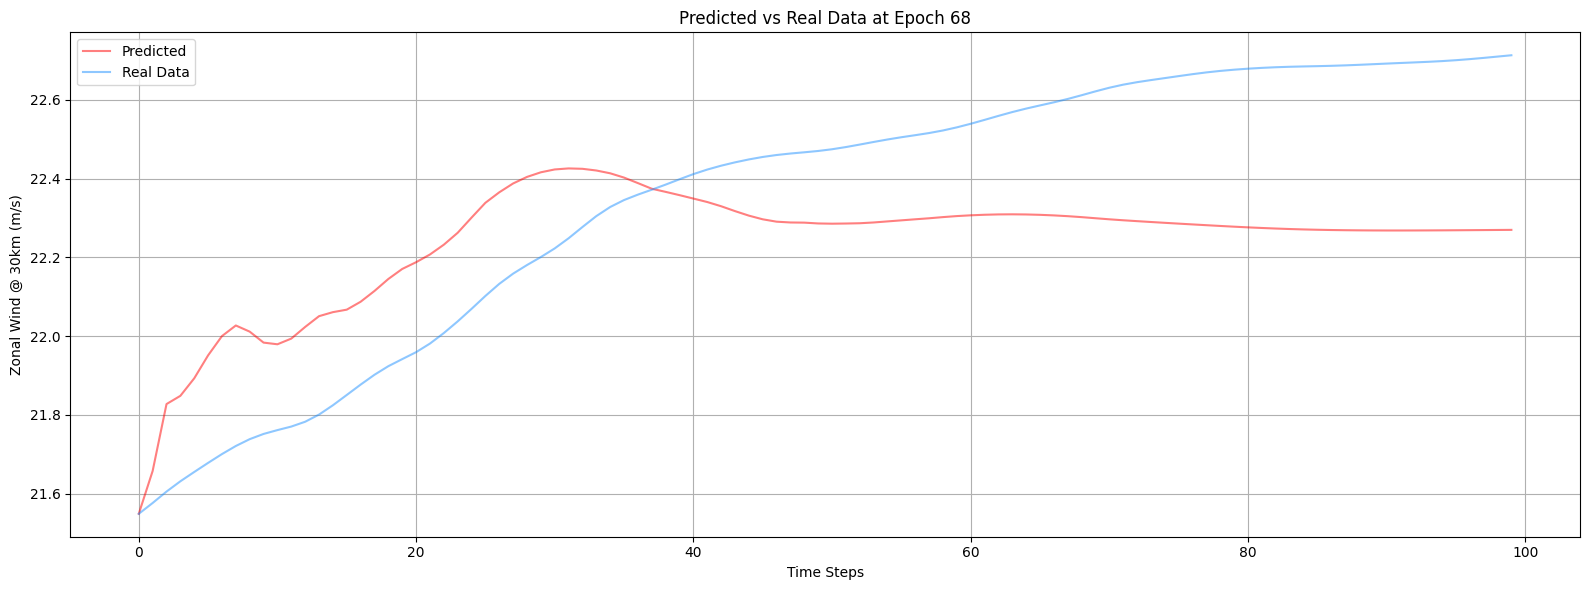

Epoch 70, 
        Reconstrunction Loss: 0.001094055245630443

        Validation Reconstrunction Loss: 0.1039523035287857
Epoch 71, 
        Reconstrunction Loss: 0.0010938100749626756

        Validation Reconstrunction Loss: 0.10346280783414841


Mini Inference at Epoch 70: 100%|██████████| 99/99 [00:00<00:00, 655.46it/s]


<Figure size 640x480 with 0 Axes>

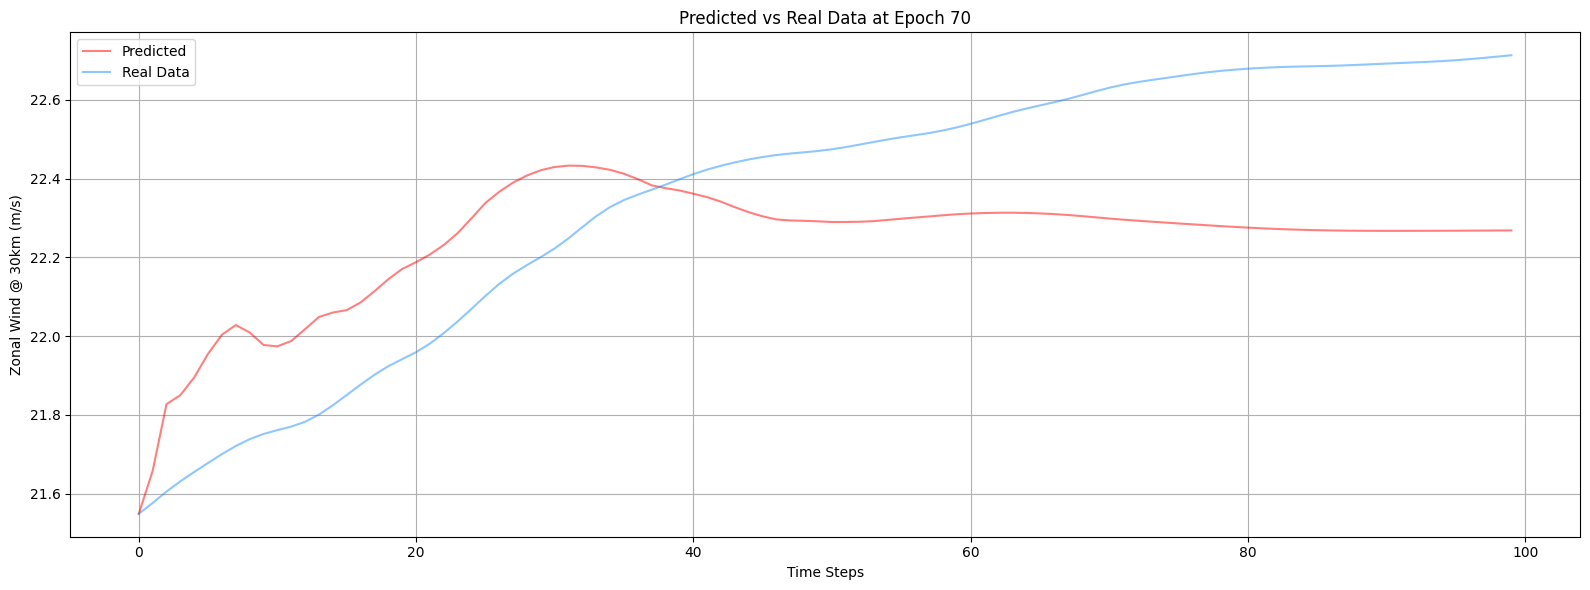

Epoch 72, 
        Reconstrunction Loss: 0.0010935793397948146

        Validation Reconstrunction Loss: 0.1029701828956604
Epoch 73, 
        Reconstrunction Loss: 0.0010933104204013944

        Validation Reconstrunction Loss: 0.10248703509569168


Mini Inference at Epoch 72: 100%|██████████| 99/99 [00:00<00:00, 1343.70it/s]


<Figure size 640x480 with 0 Axes>

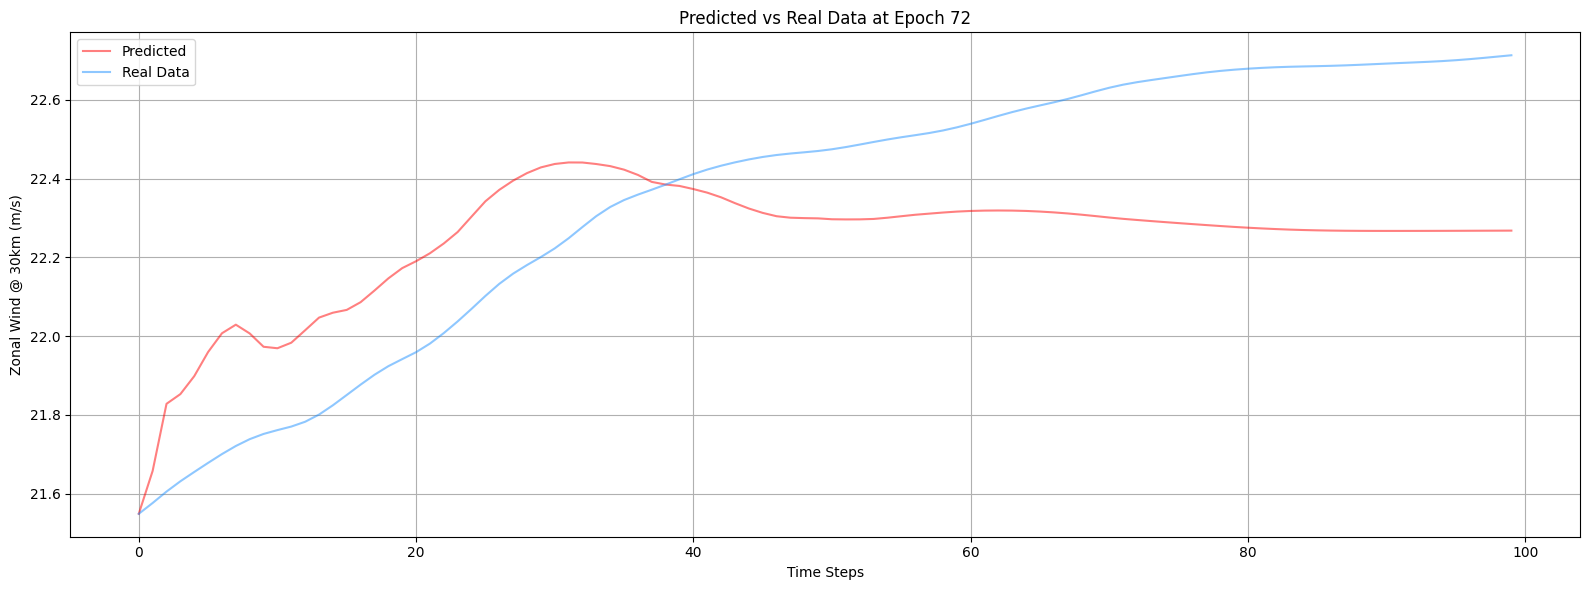

Epoch 74, 
        Reconstrunction Loss: 0.0010930206626653671

        Validation Reconstrunction Loss: 0.10203507542610168
Epoch 75, 
        Reconstrunction Loss: 0.0010928213596343994

        Validation Reconstrunction Loss: 0.10159063339233398


Mini Inference at Epoch 74: 100%|██████████| 99/99 [00:00<00:00, 1366.22it/s]


<Figure size 640x480 with 0 Axes>

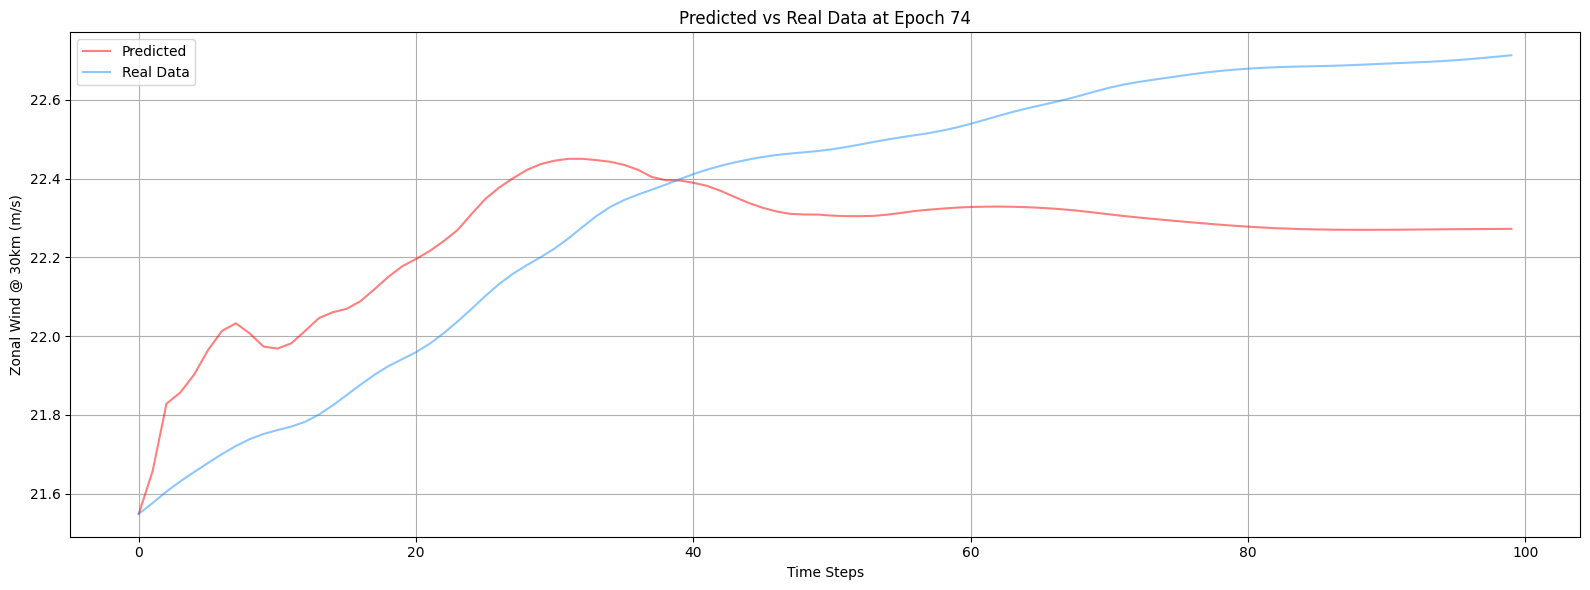

Epoch 76, 
        Reconstrunction Loss: 0.0010925749083980918

        Validation Reconstrunction Loss: 0.10119887441396713
Epoch 77, 
        Reconstrunction Loss: 0.0010923746740445495

        Validation Reconstrunction Loss: 0.10078945755958557


Mini Inference at Epoch 76: 100%|██████████| 99/99 [00:00<00:00, 1150.89it/s]


<Figure size 640x480 with 0 Axes>

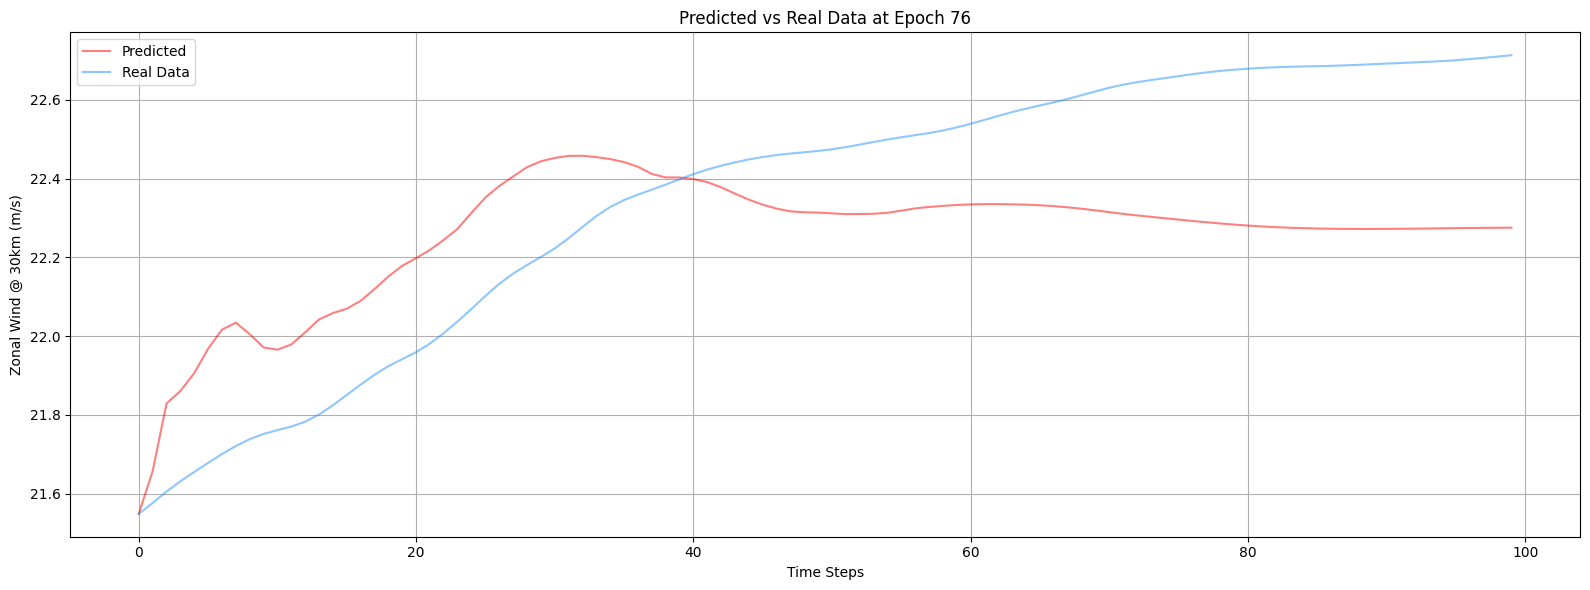

Epoch 78, 
        Reconstrunction Loss: 0.0010921221692115068

        Validation Reconstrunction Loss: 0.1004159227013588


In [ ]:
from scipy.stats import linregress
from tqdm import tqdm

def normalize_transition_time(slope_value, delta, transition_real):
    normalized = 1 - np.exp(-np.abs((slope_value - transition_real)) / delta)
    return normalized

def total_variation_distance(p, q):
    p = np.array(p)
    q = np.array(q)
    return 0.5 * np.sum(np.abs(p - q))

def calculate_transition_durations(y_values, upper_bound, lower_bound):
    times_between_transitions = []
    transition_start = None
    above_upper = False
    below_lower = False
    for i in range(1, len(y_values)):
        if y_values[i] < lower_bound:
            below_lower = True
            above_upper = False
        elif y_values[i] > upper_bound:
            if below_lower and transition_start is not None:
                times_between_transitions.append(i - transition_start)
                transition_start = None
            above_upper = True
            below_lower = False
        if below_lower and transition_start is None:
            transition_start = i
    return times_between_transitions


upper_bound = 53.8 / 2.8935
lower_bound = 7.41
level = 63
initial_val = 200_000

# Train the model
for epoch in range(num_epochs):

    model.train()
    for batch in range (0, trainN, batch_size):

        input_batch = psi_train_input[batch:batch + batch_size,:]
        label_batch = psi_train_label[batch:batch + batch_size,:]
        optimizer.zero_grad()

        output = model(input_batch.float().cuda())

        # Reconstruction loss
        reconstruction_loss = F.huber_loss(output, label_batch.float().cuda(), reduction="mean", delta = 1)
        
        #current loss
        loss = reconstruction_loss

        loss.backward()
        optimizer.step()

    print(f'''Epoch {epoch+1}, 
        Reconstrunction Loss: {loss.item()}''')

    # Validation Loss
    for batch in range (0, valN, batch_size):

        input_batch = psi_val_input[batch:batch + batch_size,:]
        label_batch = psi_val_label[batch:batch + batch_size,:]
        output = model(input_batch.float().cuda())

        # Reconstruction loss
        val_reconstruction_loss = F.huber_loss(output, label_batch.float().cuda(), reduction="mean", delta = 1)
        
        # Total loss
        val_loss = val_reconstruction_loss

    print(f'''
        Validation Reconstrunction Loss: {val_loss.item()}''')
      
    #Save and make an inference every 10 epochs of training
    if (epoch % 2 == 0):
        torch.save(model.state_dict(), f"{folder}/model_at_epoch{epoch}")
        model.eval()

        with torch.no_grad():

            initial_cond = torch.reshape(torch.tensor(normalized_psi[initial_val,:]), [1, 75]).float().cuda()
            time_steps = 100
            pred = np.zeros([time_steps, 75])
            pred[0, :] = initial_cond.detach().cpu().numpy()
            
            for k in tqdm(range(1 , time_steps), desc = f"Mini Inference at Epoch {epoch}"):
                    y = model.decode(torch.tensor(initial_cond).float().cuda()).detach().cpu().numpy()
                    pred[k, :] = y
                    initial_cond = y  
        
        pred_mean = pred * std_psi + mean_psi

        plot_real_data = psi[initial_val : initial_val + time_steps, :]
        plt.figure(figsize=(16, 6))

        plt.plot(pred_mean[:, level], label='Predicted', color='red', alpha=0.5)
        plt.plot(plot_real_data[:, level], label='Real Data', color='dodgerblue',alpha= .5)

        plt.title(f'Predicted vs Real Data at Epoch {epoch}')
        plt.xlabel('Time Steps')
        plt.ylabel('Zonal Wind @ 30km (m/s)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        plt.savefig(f'{folder}/epoch_{epoch}_pred_vs_real.png')

/tmp/ipykernel_4083/264748137.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_weights_path))


Model weights loaded from /home/fabio/work/HM_and_AI_models/VAE_Model/Push/Archictures/weights_100/model_at_epoch370.


Mini Inference at Epoch 370:   0%|          | 0/99 [00:00<?, ?it/s]/tmp/ipykernel_4083/264748137.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = model.decode(torch.tensor(initial_cond).float().cuda()).detach().cpu().numpy()
Mini Inference at Epoch 370: 100%|██████████| 99/99 [00:00<00:00, 501.21it/s]


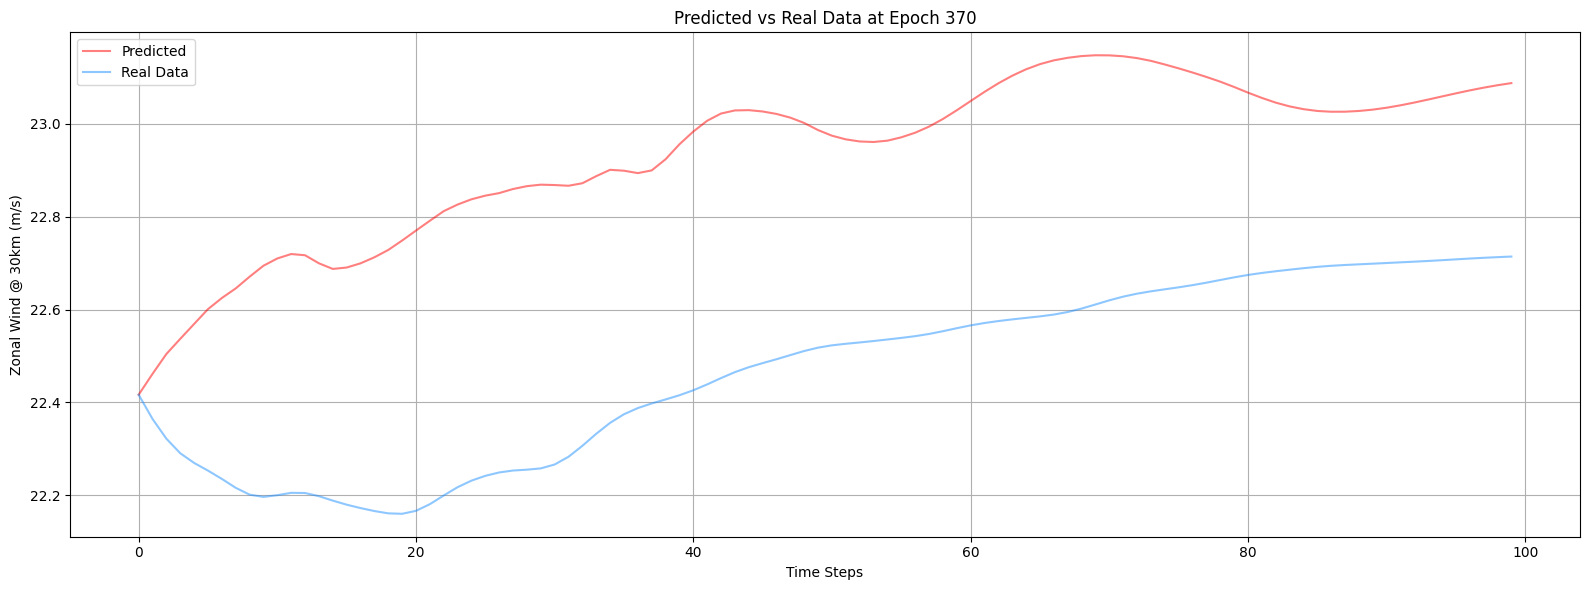

Mini Inference at Epoch 370: 100%|██████████| 99/99 [00:00<00:00, 563.62it/s]


<Figure size 640x480 with 0 Axes>

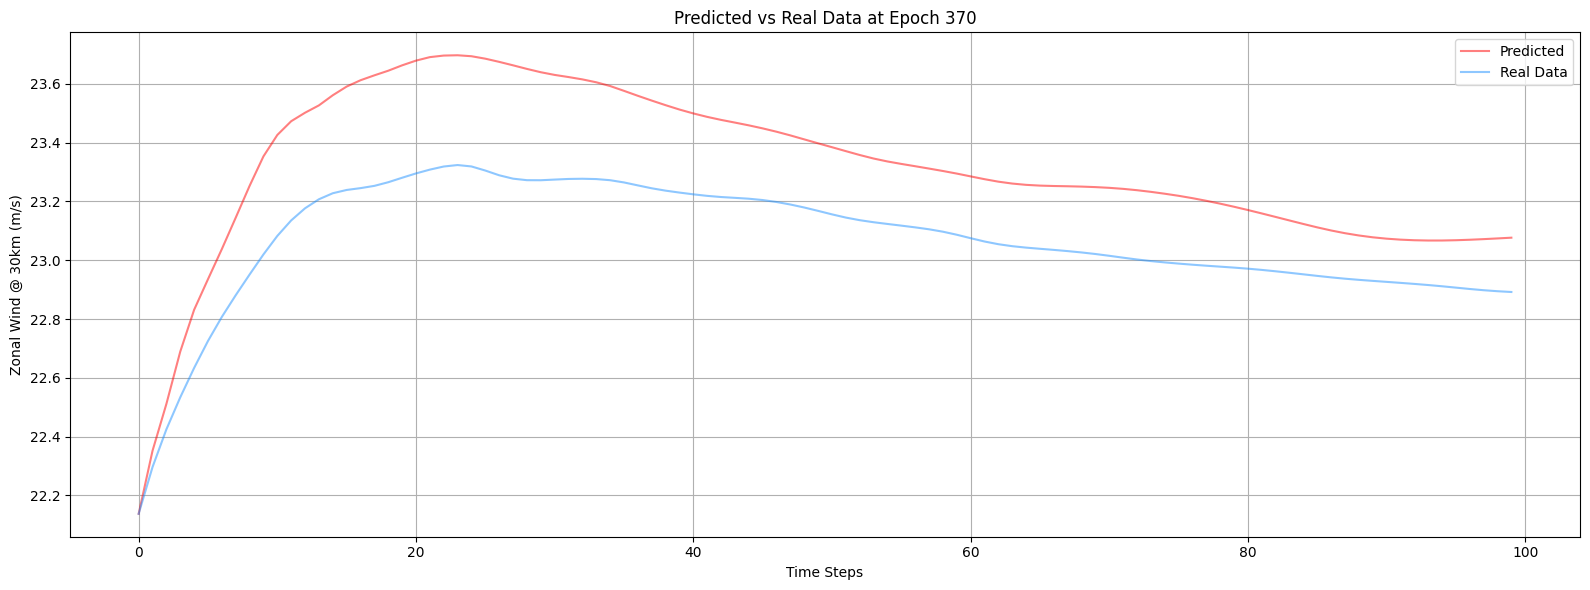

Mini Inference at Epoch 370: 100%|██████████| 99/99 [00:00<00:00, 430.81it/s]


<Figure size 640x480 with 0 Axes>

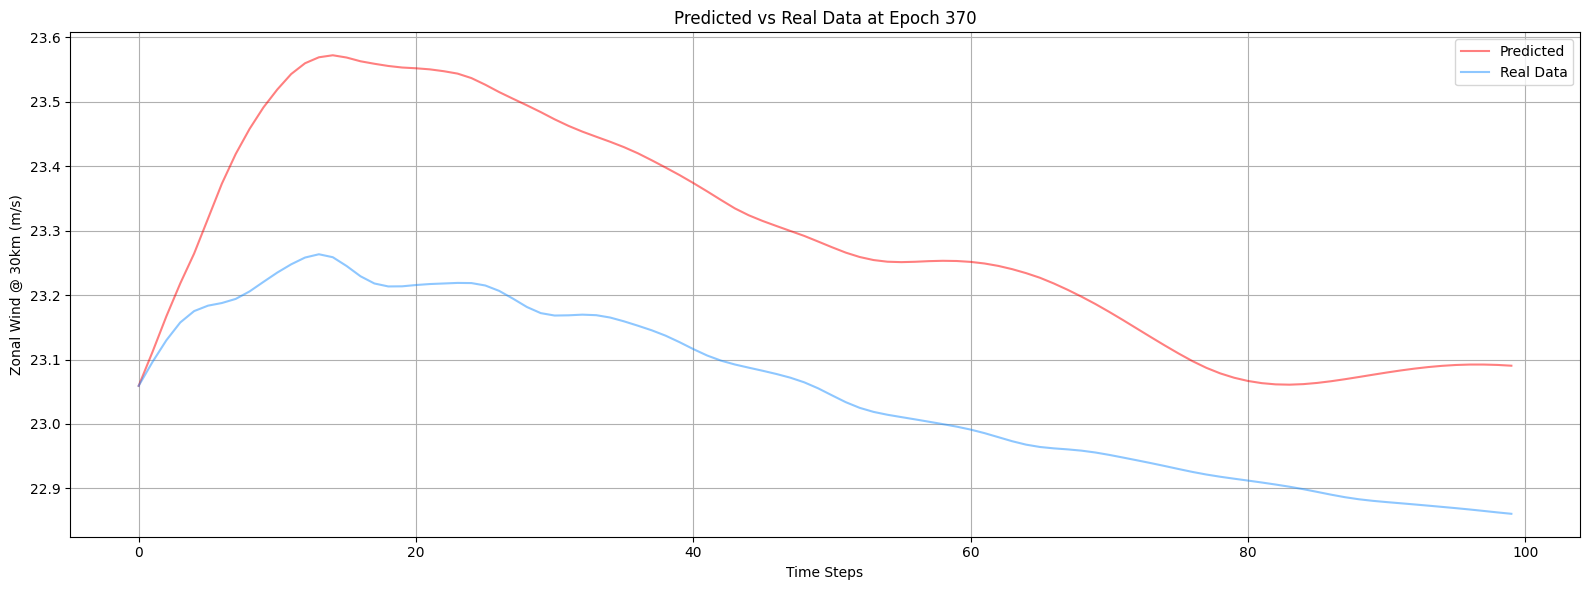

Mini Inference at Epoch 370: 100%|██████████| 99/99 [00:00<00:00, 621.82it/s]


<Figure size 640x480 with 0 Axes>

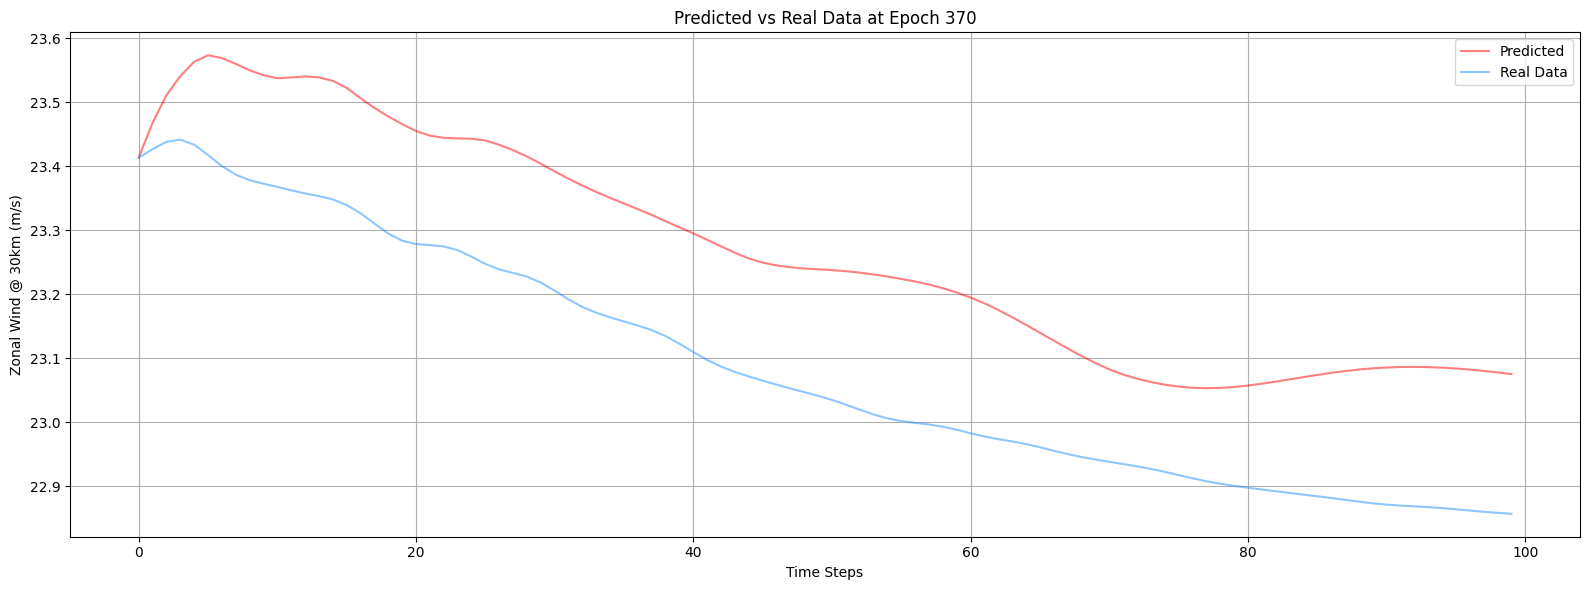

Mini Inference at Epoch 370: 100%|██████████| 99/99 [00:00<00:00, 558.21it/s]


<Figure size 640x480 with 0 Axes>

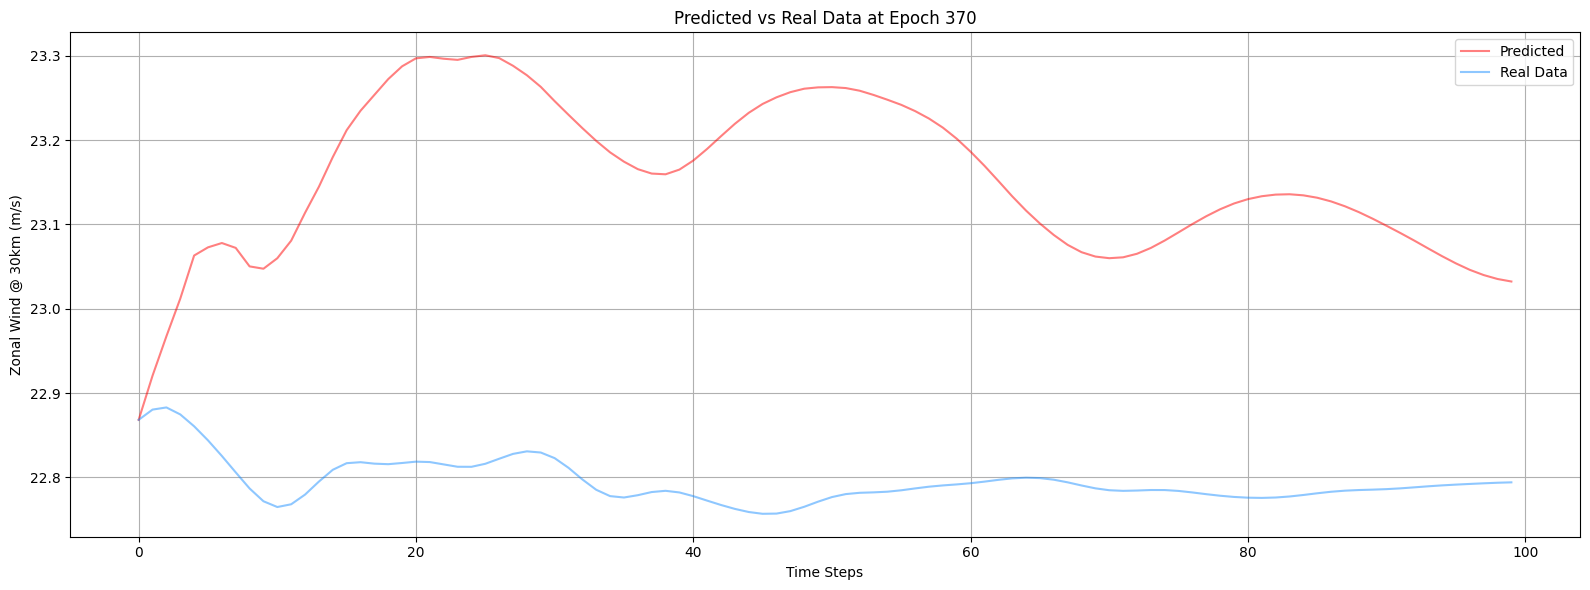

Mini Inference at Epoch 370: 100%|██████████| 99/99 [00:00<00:00, 659.78it/s]


<Figure size 640x480 with 0 Axes>

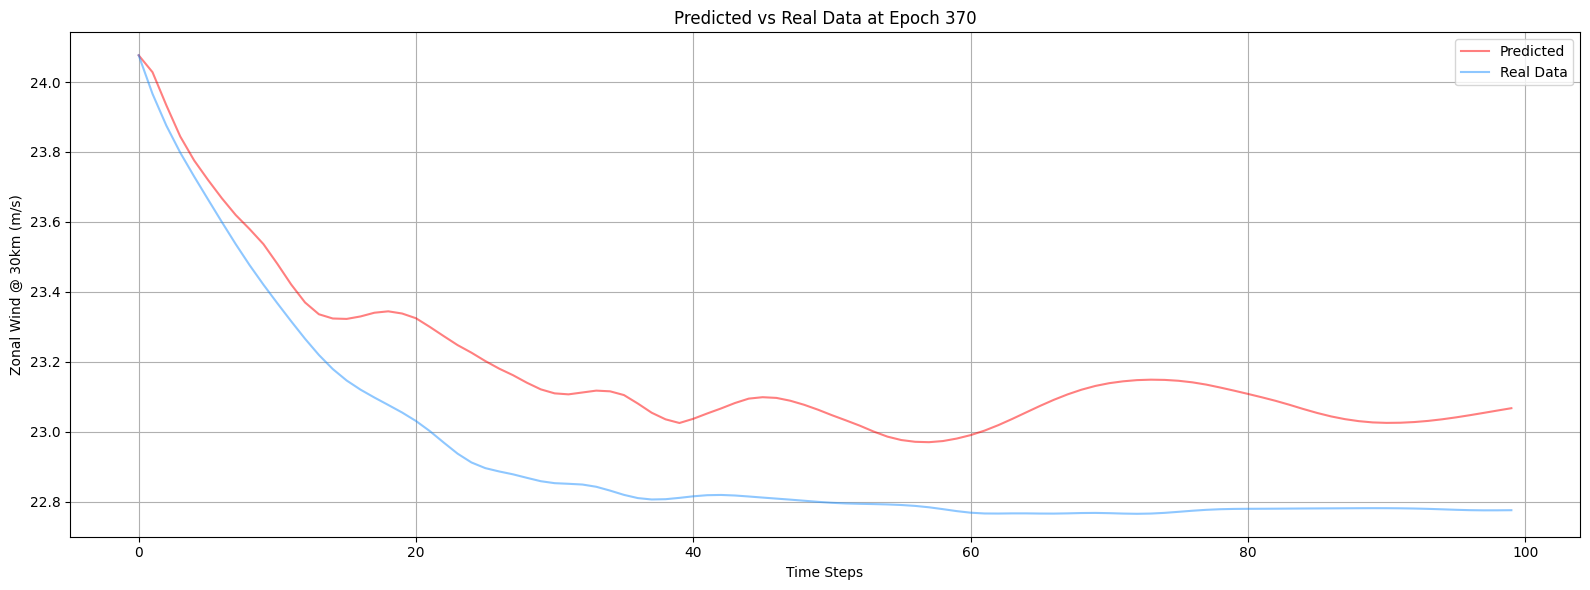

Mini Inference at Epoch 370: 100%|██████████| 99/99 [00:00<00:00, 649.78it/s]


<Figure size 640x480 with 0 Axes>

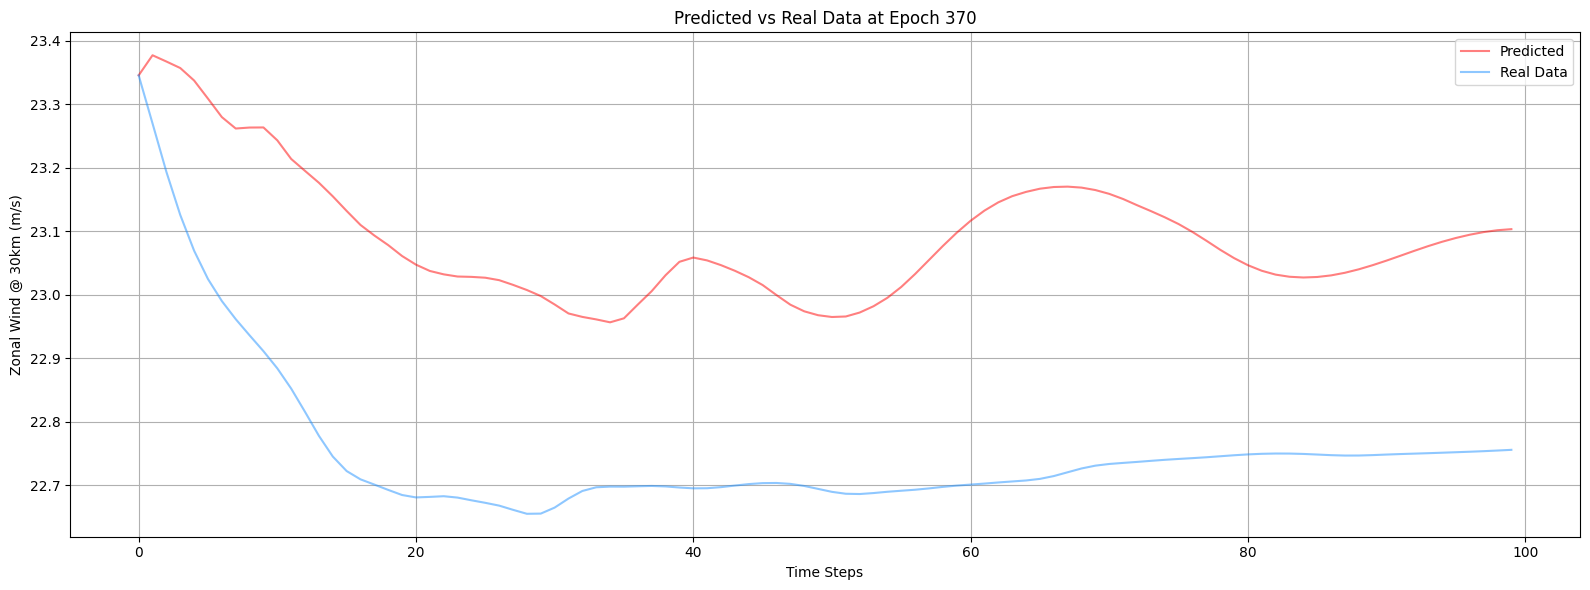

Mini Inference at Epoch 370: 100%|██████████| 99/99 [00:00<00:00, 568.41it/s]


<Figure size 640x480 with 0 Axes>

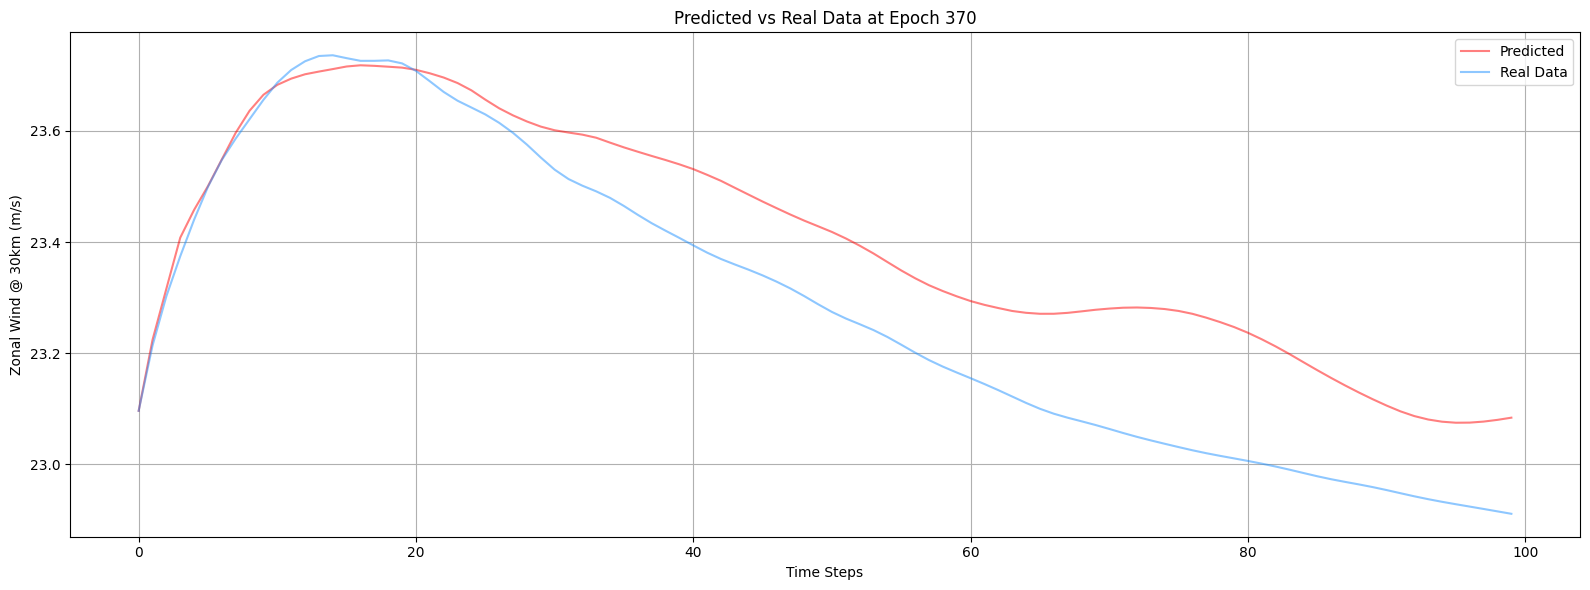

Mini Inference at Epoch 370: 100%|██████████| 99/99 [00:00<00:00, 653.13it/s]


<Figure size 640x480 with 0 Axes>

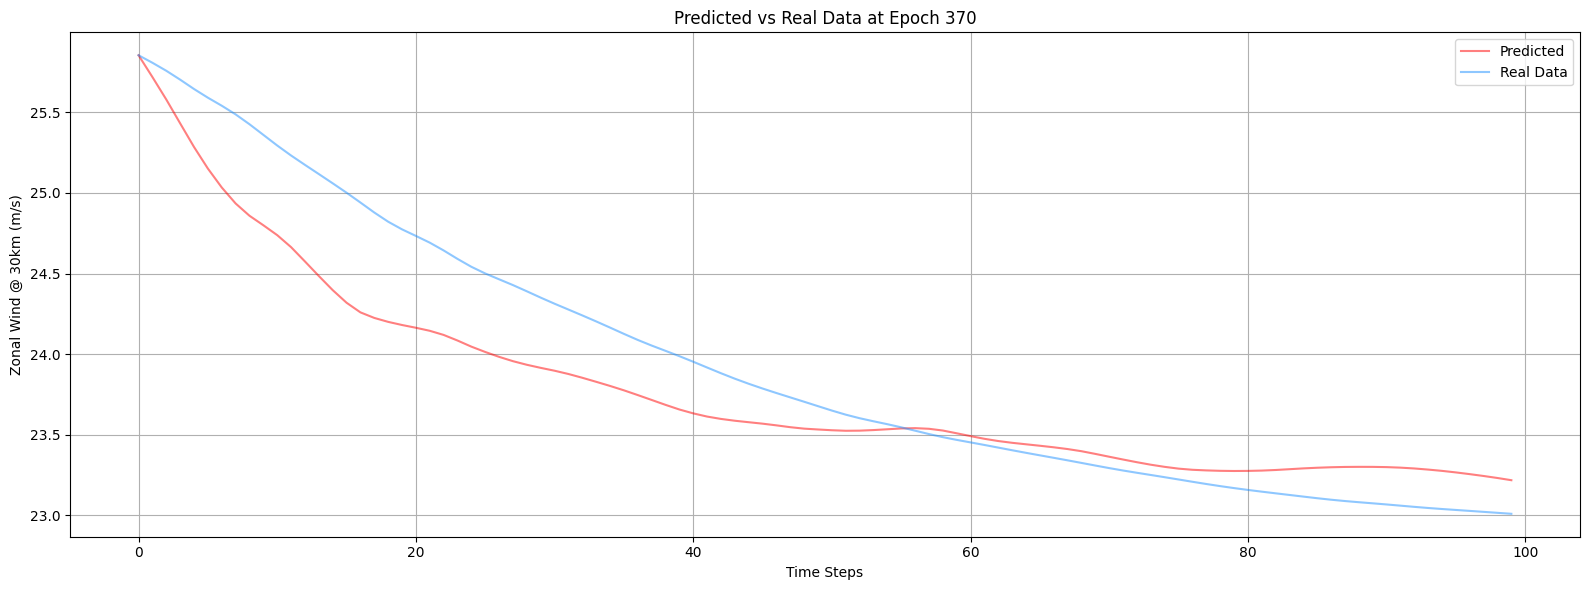

Mini Inference at Epoch 370: 100%|██████████| 99/99 [00:00<00:00, 515.54it/s]


<Figure size 640x480 with 0 Axes>

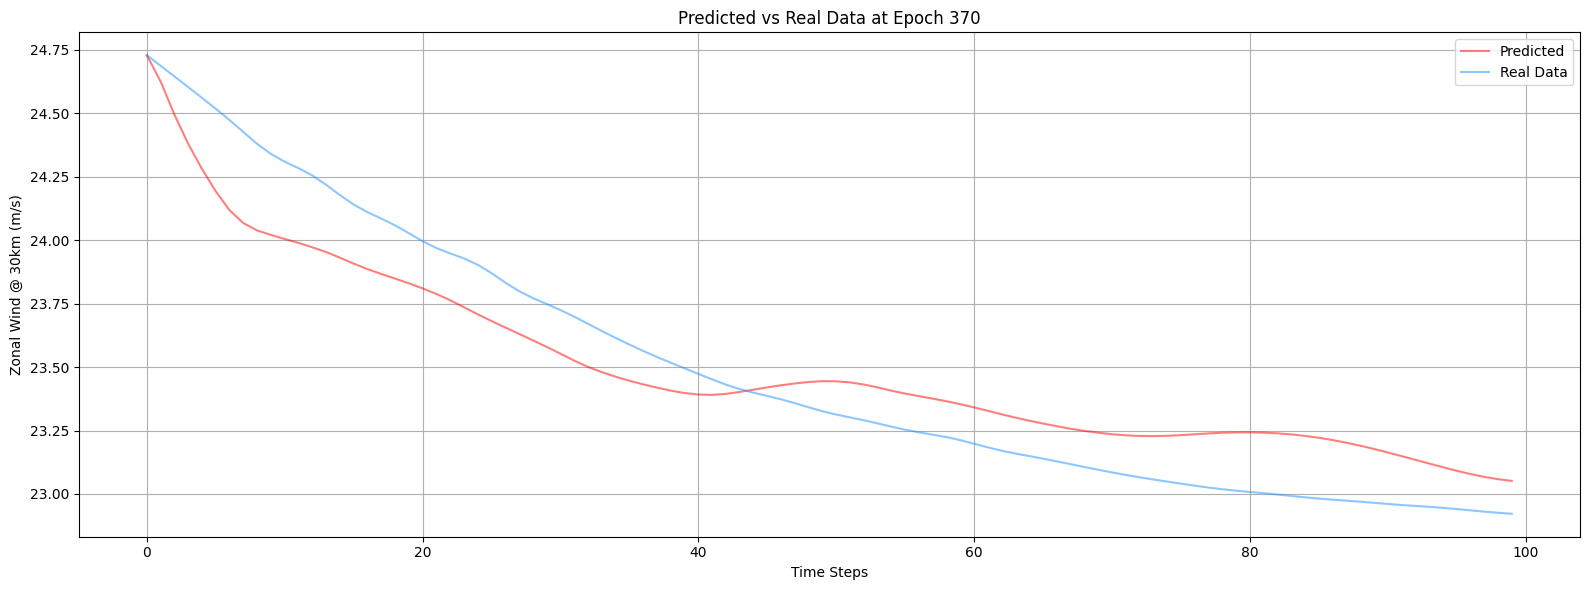

<Figure size 640x480 with 0 Axes>

In [7]:

# MODIFY THIS LINE FOR MODEL TESTING
epoch = 370

level = 63
model_weights_path = f'/home/fabio/work/HM_and_AI_models/VAE_Model/Push/Archictures/weights_100/model_at_epoch{epoch}'

if os.path.exists(model_weights_path):
    model.load_state_dict(torch.load(model_weights_path))
    print(f"Model weights loaded from {model_weights_path}.")

i = 0
while i < 10:

    initial_val = 600_000 + (i * 1000)
    with torch.no_grad():

        initial_cond = torch.reshape(torch.tensor(normalized_psi[initial_val , :]), [1, 75]).float().cuda()
        time_steps = 100
        pred = np.zeros([time_steps, 75])
        pred[0, :] = initial_cond.detach().cpu().numpy()
        
        for k in tqdm(range(1 , time_steps), desc = f"Mini Inference at Epoch {epoch}"):
                y = model.decode(torch.tensor(initial_cond).float().cuda()).detach().cpu().numpy()
                pred[k, :] = y
                initial_cond = y  

    pred_mean = pred * std_psi + mean_psi

    plot_real_data = psi[initial_val : initial_val + time_steps, :]
    plt.figure(figsize=(16, 6))

    plt.plot(pred_mean[:, level], label='Predicted', color='red', alpha=0.5)
    plt.plot(plot_real_data[:, level], label='Real Data', color='dodgerblue',alpha= .5)

    plt.title(f'Predicted vs Real Data at Epoch {epoch}')
    plt.xlabel('Time Steps')
    plt.ylabel('Zonal Wind @ 30km (m/s)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.savefig(f'{folder}/epoch_{epoch}_pred_vs_real.png')
    
    i += 1


# Testing

In [ ]:
#FLAGS to determine testing
plot_data = 1
#what level do you want to plot
level = 63
CCDF = 1
Bi_modal_distribution = 1
single_step_profiles = 1
#for the single_step_profiles
NUM_SAMPLES = 5
#what weights do you want to use?

MODEL_PATH = r"/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_KL_TEST_at_2025-06-03 10:39:03.562572/model_at_2_with_kl_10/checkpoint_2"
LEVEL = 63

import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

# Load the data; shape = (300000, 2, 75)
real_data = np.load(r"/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/data/actual/long_run_310k.npy")
predictions = np.load(r"/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/predictions_best_checkpoint_and_cycle_Resnet_VAE_1.npy")

#reshape the predictions so that it matches the real_data shape
print(predictions.shape)
print(real_data.shape)
timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S.%f")
folder = f"testing_at_{timestamp}"
os.mkdir(folder)
subfolders = ['timeseries', 'CCDF', 'bi_modal_distribution', 'single_step_profiles']
# Create each subdirectory inside the main folder
for subfolder in subfolders:
    path = os.path.join(folder, subfolder)
    os.mkdir(path)
    print(f"Created subfolder: {path}")
SAVE_DIR = os.path.join(folder, "single_step_profiles")
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import random

model = ConditionalVAE(latent_dim, output_dim, condition_dim)
model = model.cuda()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# MODIFY THIS LINE FOR MODEL TESTING
model_weights_path = "/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_lat1024_at_2025-04-11 12:46:39.526973/model_at_0/checkpoint_3"

if os.path.exists(model_weights_path):
    model.load_state_dict(torch.load(model_weights_path))
    print(f"Model weights loaded from {model_weights_path}.")
    
if (plot_data):
    #note that the value 300000 will have to change depending on the real and predictions data length
    u_profile_real = real_data[:300000, 1, level]  # Match time length with predictions
    u_profile_pred = predictions[:, level]
    time_steps = np.arange(len(u_profile_pred))

    # === Plot ===
    plt.figure(figsize=(14, 6))

    plt.plot(time_steps, u_profile_real, label='Real Data', alpha=0.7)
    plt.plot(time_steps, u_profile_pred, label='Predictions', linestyle='--')


    # Labels, legend, and formatting
    plt.xlabel('Time step')
    plt.ylabel('U (m/s)')
    plt.title(f'Time Series of U at Vertical Level {level}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    save_path = os.path.join(folder, "timeseries")
    save_path = os.path.join(save_path, "real_prediction_plot")
    plt.savefig(save_path)
    plt.show()

if (CCDF):
    real_data_1d = real_data[:, 1, 63]  # Now shape is (309700,)
    predictions_1d = predictions[:, 63]  # shape (300000,)

    # Define bounds (assuming they apply to both datasets)
    upper_bound = 53.8 / 2.8935
    lower_bound = 1.75 / 2.8935

    # Function to calculate transition durations
    def calculate_transition_durations(y_values, upper_bound, lower_bound):
        times_between_transitions = []
        transition_start = None
        above_upper = False
        below_lower = False

        for i in range(1, len(y_values)):
            if y_values[i] < lower_bound:  
                below_lower = True
                above_upper = False
            elif y_values[i] > upper_bound:  
                if below_lower and transition_start is not None:
                    times_between_transitions.append(i - transition_start)
                    transition_start = None  
                above_upper = True
                below_lower = False

            if below_lower and transition_start is None:
                transition_start = i

        return times_between_transitions

    # Compute transition durations for real data
    real_durations = calculate_transition_durations(real_data_1d, upper_bound, lower_bound)

    # Compute transition durations for predictions data
    pred_durations = calculate_transition_durations(predictions_1d, upper_bound, lower_bound)

    # Plot setup
    plt.figure(figsize=(10, 6))

    # === REAL DATA CCDF AND FIT ===
    if len(real_durations) == 0:
        print("No transitions detected in real data with current bounds!")
    else:
        real_data_sorted = np.sort(real_durations)
        x_line_real = np.linspace(min(real_data_sorted), max(real_data_sorted), 100)
        exponential_fit_real = 1/np.mean(real_data_sorted)
        y_values_real = exponential_fit_real*x_line_real
        plt.plot(x_line_real, y_values_real, 'b-', label=f'Real Exp Fit (slope={exponential_fit_real:.4f})', linewidth=2)

    # === PREDICTIONS CCDF AND FIT ===
    if len(pred_durations) == 0:
        print("No transitions detected in predictions with current bounds!")
    else:
        pred_data_sorted = np.sort(pred_durations)
        x_line_pred = np.linspace(min(pred_data_sorted), max(pred_data_sorted), 100)
        exponential_fit_pred = 1/np.mean(pred_data_sorted)
        y_values_pred = exponential_fit_pred*x_line_pred
        plt.plot(x_line_pred, y_values_pred, 'r-', label=f'Pred Exp Fit (slope={exponential_fit_pred:.4f})', linewidth=2)

    print(1/np.mean(real_data_sorted))
    print(1/np.mean(pred_data_sorted))
    # Plot labels and formatting
    plt.xlabel('Time Duration (Steps)')
    plt.ylabel('CCDF')
    plt.title('CCDF of Time Between B->A and A->B Transitions (Exponential Fit)')
    plt.yscale("linear")  # y-axis log scale
    plt.xscale("linear")  # x-axis linear scale
    plt.grid()
    plt.legend()
    plt.tight_layout()
    save_path = os.path.join(folder, "CCDF")
    save_path = os.path.join(save_path, "CCDF_plot")
    plt.savefig(save_path)
    plt.show()
if (Bi_modal_distribution):
    zonal_wind_data_real = real_data[:, 1, 63]  # variable index 1 (e.g., zonal wind), level 60
    zonal_wind_data_predictions = predictions[:, 63]  # variable index 0 (predictions), level 60

    print(f"Shape of zonal_wind_data_real: {zonal_wind_data_real.shape}")
    print(f"Shape of zonal_wind_data_predictions: {zonal_wind_data_predictions.shape}")

    # Plot the bimodal histogram
    plt.figure(figsize=(12, 6))

    # Create histograms (overlaid)
    sns.histplot(zonal_wind_data_real, bins=50, kde=True, color='black', alpha=0.6, element='step', label='Real Data')
    sns.histplot(zonal_wind_data_predictions, bins=50, kde=True, color='red', alpha=0.6, element='step', label='Predictions')

    # Customize plot labels and title
    plt.title('Distribution of Zonal Winds For Real Data and Predictions', fontsize=16)
    plt.xlabel('Zonal Wind (m/s)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Add vertical lines at means
    plt.axvline(np.mean(zonal_wind_data_real), color='black', linestyle='--', label=f'Real Mean: {np.mean(zonal_wind_data_real):.2f}')
    plt.axvline(np.mean(zonal_wind_data_predictions), color='red', linestyle='--', label=f'Pred Mean: {np.mean(zonal_wind_data_predictions):.2f}')

    # Final plot settings
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    save_path = os.path.join(folder, "bi_modal_distribution")
    save_path = os.path.join(save_path, "bi_modal_distribution_plot")
    plt.savefig(save_path)
    plt.show()
if (single_step_profiles):
    # Ensure save directory exists
    os.makedirs(SAVE_DIR, exist_ok=True)

    # === Load model weights ===
    model.load_state_dict(torch.load(MODEL_PATH))
    model.eval()

    # === Randomly sample time points from real data ===
    time_indices = random.sample(range(0, real_data.shape[0] - 2), NUM_SAMPLES)
    print(f"Randomly sampled time steps: {time_indices}")

    # === Time series visualization ===
    real_data_timeseries = real_data[:, 1, LEVEL]
    time_steps_all = np.arange(len(real_data_timeseries))

    plt.figure(figsize=(12, 6))
    plt.plot(time_steps_all, real_data_timeseries, label="Real Data at Level 61", color='blue')

    # Mark sample points
    for idx_num, idx in enumerate(time_indices):
        plt.axvline(x=idx, color='green', linestyle='--', linewidth=2)
    if len(time_indices) > 0:
        plt.axvline(x=time_indices[0], color='green', linestyle='--', linewidth=2, label='Sampled Points')

    plt.title("Real Data Time Series with Sampled Points Highlighted")
    plt.xlabel("Time Step")
    plt.ylabel("U (m/s) at Level 61")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    save_path = os.path.join(SAVE_DIR, "real_data_timeseries_with_samples.png")
    plt.savefig(save_path)
    plt.show()

    # === Iterate over each sampled time point ===
    for i, time_step in enumerate(time_indices):
        next_time_step = time_step + 1

        # === Real data: current and next ===
        real_current = real_data[time_step, 1, :]       
        real_next = real_data[next_time_step, 1, :]      

        # === Normalize real_current and make prediction for next step ===
        initial_cond = torch.reshape(torch.tensor(psi[time_step,:]), [1, 75])
        condition = torch.zeros([1,latent_dim])
        num_ens = 1
        pred = np.zeros ([time_step, 75, num_ens])

        with torch.no_grad():
            condition = torch.randn_like(condition)
            print(condition.shape, initial_cond.shape)
            y = (model.decode(condition.float().cuda(),initial_cond.float().cuda())).detach().cpu().numpy()

        # === Denormalize predicted next ===
        pred_next_denorm = y.squeeze() * std_psi.squeeze() + mean_psi.squeeze()

        # === Extract U, Re(Psi), Im(Psi) components ===
        # U profiles
        U_current_real = real_current[51:74]
        U_next_real = real_next[51:74]
        U_next_pred = pred_next_denorm[51:74]

        # Re(Psi) profiles
        RePsi_current_real = real_current[0:24]
        RePsi_next_real = real_next[0:24]
        RePsi_next_pred = pred_next_denorm[0:24]

        # Im(Psi) profiles
        ImPsi_current_real = real_current[25:50]
        ImPsi_next_real = real_next[25:50]
        ImPsi_next_pred = pred_next_denorm[25:50]

        # === Differences ===
        U_diff_real = U_next_real - U_current_real
        U_diff_pred = U_next_pred - U_current_real

        RePsi_diff_real = RePsi_next_real - RePsi_current_real
        RePsi_diff_pred = RePsi_next_pred - RePsi_current_real

        ImPsi_diff_real = ImPsi_next_real - ImPsi_current_real
        ImPsi_diff_pred = ImPsi_next_pred - ImPsi_current_real

        # === Create a single figure with 3 rows (U, Re(Psi), Im(Psi)) ===
        fig, axes = plt.subplots(3, 2, figsize=(16, 18))  # 3 rows, 2 columns (Profile and Difference)

        z_levels_U = np.linspace(0, 70, 23)
        z_levels_RePsi = np.linspace(0, 70, 24)
        z_levels_ImPsi = np.linspace(0, 70, 25)

        # --- U ---
        axes[0, 0].plot(U_current_real, z_levels_U, 'x-', label="Real Current")
        axes[0, 0].plot(U_next_real, z_levels_U, 'd-', label="Real Next")
        axes[0, 0].plot(U_next_pred, z_levels_U, 's--', label="Predicted Next")
        axes[0, 0].set_title(f"U Profiles @ Step {time_step}")
        axes[0, 0].set_xlabel("U (m/s)")
        axes[0, 0].set_ylabel("Vertical Levels (km)")
        axes[0, 0].legend()

        axes[0, 1].plot(U_diff_real, z_levels_U, 'xb', label="Real Δ (Next - Current)")
        axes[0, 1].plot(U_diff_pred, z_levels_U, 'o--r', label="Pred Δ (Next - Current)")
        axes[0, 1].set_title("U Difference (Next - Current)")
        axes[0, 1].set_xlabel("ΔU (m/s)")
        axes[0, 1].legend()

        # --- Re(Psi) ---
        axes[1, 0].plot(RePsi_current_real, z_levels_RePsi, 'x-', label="Real Current")
        axes[1, 0].plot(RePsi_next_real, z_levels_RePsi, 'd-', label="Real Next")
        axes[1, 0].plot(RePsi_next_pred, z_levels_RePsi, 's--', label="Predicted Next")
        axes[1, 0].set_title(f"Re(Psi) Profiles @ Step {time_step}")
        axes[1, 0].set_xlabel("Re(Psi)")
        axes[1, 0].set_ylabel("Vertical Levels (km)")
        axes[1, 0].legend()

        axes[1, 1].plot(RePsi_diff_real, z_levels_RePsi, 'xb', label="Real Δ (Next - Current)")
        axes[1, 1].plot(RePsi_diff_pred, z_levels_RePsi, 'o--r', label="Pred Δ (Next - Current)")
        axes[1, 1].set_title("Re(Psi) Difference (Next - Current)")
        axes[1, 1].set_xlabel("ΔRe(Psi)")
        axes[1, 1].legend()

        # --- Im(Psi) ---
        axes[2, 0].plot(ImPsi_current_real, z_levels_ImPsi, 'x-', label="Real Current")
        axes[2, 0].plot(ImPsi_next_real, z_levels_ImPsi, 'd-', label="Real Next")
        axes[2, 0].plot(ImPsi_next_pred, z_levels_ImPsi, 's--', label="Predicted Next")
        axes[2, 0].set_title(f"Im(Psi) Profiles @ Step {time_step}")
        axes[2, 0].set_xlabel("Im(Psi)")
        axes[2, 0].set_ylabel("Vertical Levels (km)")
        axes[2, 0].legend()

        axes[2, 1].plot(ImPsi_diff_real, z_levels_ImPsi, 'xb', label="Real Δ (Next - Current)")
        axes[2, 1].plot(ImPsi_diff_pred, z_levels_ImPsi, 'o--r', label="Pred Δ (Next - Current)")
        axes[2, 1].set_title("Im(Psi) Difference (Next - Current)")
        axes[2, 1].set_xlabel("ΔIm(Psi)")
        axes[2, 1].legend()

        # === Finalize and Save ===
        plt.suptitle(f"Single Step Profile Comparisons at Time Step {time_step}", fontsize=18)
        plt.tight_layout(rect=[0, 0.03, 1, 0.97])

        save_path = os.path.join(SAVE_DIR, f"Profile_Summary_point_{time_step}.png")
        plt.savefig(save_path)
        plt.show()

        print(f"Combined plot saved for sampled point {time_step}")

    # Final debug
    print("Finished processing all sampled points.")
        # Debugging prints
    print(predictions.shape) 
    print(real_data.shape)